In [1]:
import keras
from keras.datasets import mnist
from keras import backend as K
import pandas as pd
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
sns.set_theme(style="whitegrid")

Using TensorFlow backend.


# Práctica Redes Neuronales II

Primero vamos a usar redes para aprender una función simple: una parábola.

Vamos a usar solo 100 puntos y dividirlos en training y validation

Text(0, 0.5, 'Y')

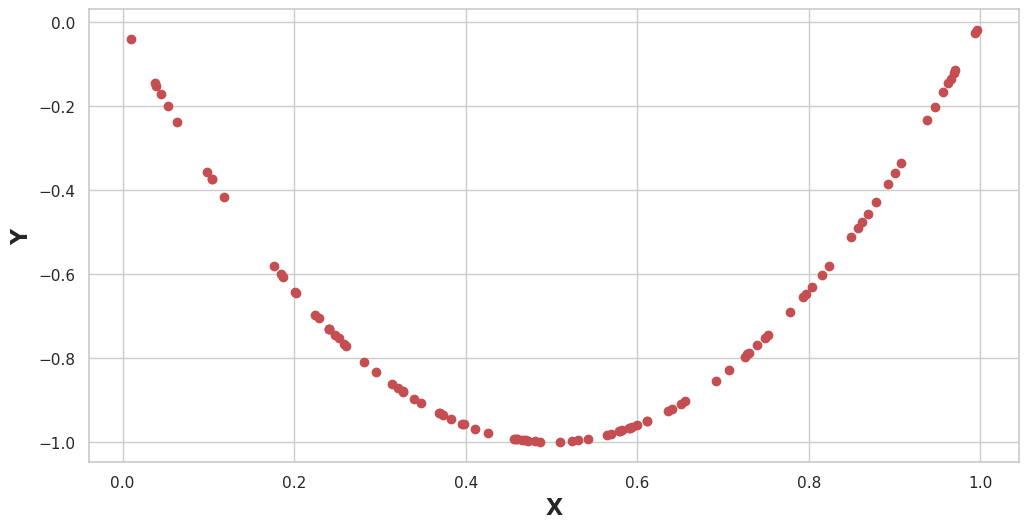

In [2]:
#Genero los puntos
x=np.random.uniform(0, 1, 100)
y=[4*i*(i-1) for i in x]

#ploteo
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(x,y,'or')
plt.xlabel('X', weight="bold", fontsize=16)
plt.ylabel('Y', weight="bold", fontsize=16)

Divido en training y validation set usando train_test_split de sklearn usando 1/3 de puntos como validation

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_validation, y_train, y_validation = train_test_split(x, y, test_size=0.33, random_state=42)

Usamos [Sequential](https://keras.io/api/models/sequential/) de keras para definir un modelo tipo stack de capas: vamos a usar ahora solo capas tipo [Dense](https://keras.io/api/layers/core_layers/dense/)

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

Usamos para regresiones como activación de la última capa un función de tipo lineal

In [6]:
model = Sequential()
model.add(Dense(3, input_dim=1, activation='tanh'))
model.add(Dense(1, activation='linear'))

Luego de definir todas las capas tenemos que compilar el modelo para definir la función de pérdida, el optimizador y la métrica. Esto es necesario para poder después entrenar el modelo.

In [7]:
model.compile(loss='mean_squared_error', optimizer="SGD", metrics=['mean_squared_error'])

Vamos a guardar el [.fit ](https://keras.io/api/models/model_training_apis/) del modelo en una variable para después plotear el aprendizaje. Podemos pasar como parámetros el set de validación para ir evaluando en cada paso del entrenamiento, además de evaluar el de entrenamiento. Podemos cambiar la cantidad de información que nos muestra con verbose y además tenemos que decirle la cantidad de épocas que queremos entrenar.

In [8]:
history = model.fit(np.array(X_train), np.array(y_train), epochs=200, verbose=2, validation_data=(X_validation, np.array(y_validation)))

Train on 67 samples, validate on 33 samples
Epoch 1/200
0s - loss: 0.2238 - mean_squared_error: 0.2238 - val_loss: 0.2322 - val_mean_squared_error: 0.2322
Epoch 2/200
0s - loss: 0.2223 - mean_squared_error: 0.2223 - val_loss: 0.2299 - val_mean_squared_error: 0.2299
Epoch 3/200
0s - loss: 0.2196 - mean_squared_error: 0.2196 - val_loss: 0.2279 - val_mean_squared_error: 0.2279
Epoch 4/200
0s - loss: 0.2177 - mean_squared_error: 0.2177 - val_loss: 0.2261 - val_mean_squared_error: 0.2261
Epoch 5/200
0s - loss: 0.2151 - mean_squared_error: 0.2151 - val_loss: 0.2239 - val_mean_squared_error: 0.2239
Epoch 6/200
0s - loss: 0.2119 - mean_squared_error: 0.2119 - val_loss: 0.2223 - val_mean_squared_error: 0.2223
Epoch 7/200
0s - loss: 0.2092 - mean_squared_error: 0.2092 - val_loss: 0.2209 - val_mean_squared_error: 0.2209
Epoch 8/200
0s - loss: 0.2065 - mean_squared_error: 0.2065 - val_loss: 0.2193 - val_mean_squared_error: 0.2193
Epoch 9/200
0s - loss: 0.2047 - mean_squared_error: 0.2047 - val_los

0s - loss: 0.1237 - mean_squared_error: 0.1237 - val_loss: 0.1334 - val_mean_squared_error: 0.1334
Epoch 117/200
0s - loss: 0.1231 - mean_squared_error: 0.1231 - val_loss: 0.1329 - val_mean_squared_error: 0.1329
Epoch 118/200
0s - loss: 0.1232 - mean_squared_error: 0.1232 - val_loss: 0.1326 - val_mean_squared_error: 0.1326
Epoch 119/200
0s - loss: 0.1227 - mean_squared_error: 0.1227 - val_loss: 0.1322 - val_mean_squared_error: 0.1322
Epoch 120/200
0s - loss: 0.1224 - mean_squared_error: 0.1224 - val_loss: 0.1320 - val_mean_squared_error: 0.1320
Epoch 121/200
0s - loss: 0.1221 - mean_squared_error: 0.1221 - val_loss: 0.1318 - val_mean_squared_error: 0.1318
Epoch 122/200
0s - loss: 0.1217 - mean_squared_error: 0.1217 - val_loss: 0.1319 - val_mean_squared_error: 0.1319
Epoch 123/200
0s - loss: 0.1218 - mean_squared_error: 0.1218 - val_loss: 0.1314 - val_mean_squared_error: 0.1314
Epoch 124/200
0s - loss: 0.1213 - mean_squared_error: 0.1213 - val_loss: 0.1310 - val_mean_squared_error: 0.13

Vemos el predict de los puntos de validación y ploteamos 

In [9]:
pred = model.predict(X_validation)

Text(0, 0.5, 'Y')

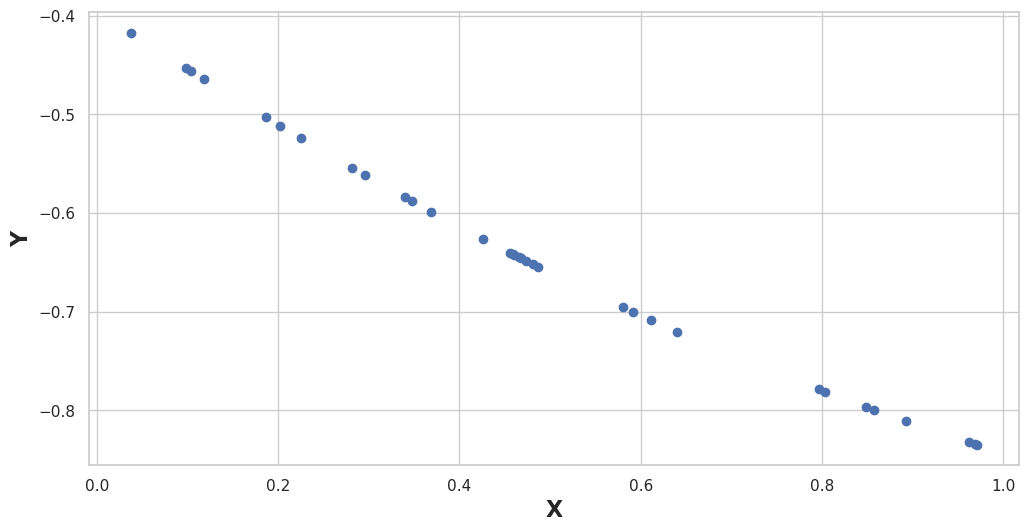

In [10]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(X_validation, pred, "ob", label="test")
plt.xlabel('X', weight="bold", fontsize=16)
plt.ylabel('Y', weight="bold", fontsize=16)

Vemos que si bien aprendio parte del comportamiento de la función, podríamos intentar mejorar el aprendizaje.

.history del .fit es un JSON que tiene los valores impresos durante el entramiento(métricas y loss)

history.history

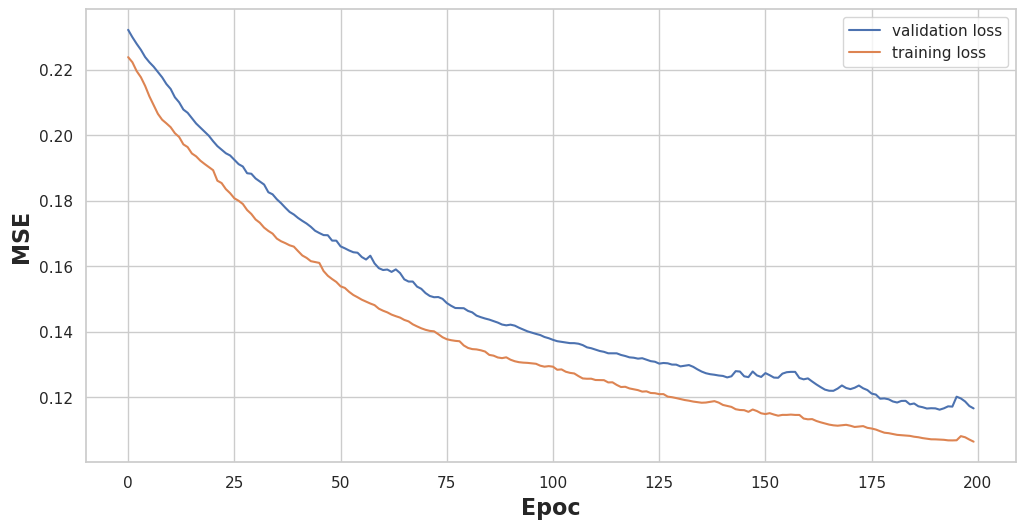

In [11]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(history.history["val_loss"], label="validation loss")
plt.plot(history.history["loss"], label="training loss")
plt.xlabel("Epoc", weight="bold", fontsize=16)
plt.ylabel("MSE", weight="bold", fontsize=16)
plt.legend()

In [12]:
model = Sequential()
model.add(Dense(3, input_dim=1, activation='tanh'))
model.add(Dense(1, activation='linear'))

In [13]:
opt = keras.optimizers.SGD(lr=0.1)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_squared_error'])

In [14]:
history = model.fit(np.array(X_train), np.array(y_train), epochs=500, verbose=2, validation_data=(X_validation, np.array(y_validation)))

Train on 67 samples, validate on 33 samples
Epoch 1/500
0s - loss: 0.2126 - mean_squared_error: 0.2126 - val_loss: 0.1257 - val_mean_squared_error: 0.1257
Epoch 2/500
0s - loss: 0.1080 - mean_squared_error: 0.1080 - val_loss: 0.1727 - val_mean_squared_error: 0.1727
Epoch 3/500
0s - loss: 0.1300 - mean_squared_error: 0.1300 - val_loss: 0.1017 - val_mean_squared_error: 0.1017
Epoch 4/500
0s - loss: 0.0939 - mean_squared_error: 0.0939 - val_loss: 0.0982 - val_mean_squared_error: 0.0982
Epoch 5/500
0s - loss: 0.0924 - mean_squared_error: 0.0924 - val_loss: 0.0990 - val_mean_squared_error: 0.0990
Epoch 6/500
0s - loss: 0.0894 - mean_squared_error: 0.0894 - val_loss: 0.0957 - val_mean_squared_error: 0.0957
Epoch 7/500
0s - loss: 0.0924 - mean_squared_error: 0.0924 - val_loss: 0.0998 - val_mean_squared_error: 0.0998
Epoch 8/500
0s - loss: 0.0941 - mean_squared_error: 0.0941 - val_loss: 0.0938 - val_mean_squared_error: 0.0938
Epoch 9/500
0s - loss: 0.0906 - mean_squared_error: 0.0906 - val_los

0s - loss: 0.0630 - mean_squared_error: 0.0630 - val_loss: 0.0693 - val_mean_squared_error: 0.0693
Epoch 113/500
0s - loss: 0.0629 - mean_squared_error: 0.0629 - val_loss: 0.0671 - val_mean_squared_error: 0.0671
Epoch 114/500
0s - loss: 0.0652 - mean_squared_error: 0.0652 - val_loss: 0.0636 - val_mean_squared_error: 0.0636
Epoch 115/500
0s - loss: 0.0604 - mean_squared_error: 0.0604 - val_loss: 0.0617 - val_mean_squared_error: 0.0617
Epoch 116/500
0s - loss: 0.0601 - mean_squared_error: 0.0601 - val_loss: 0.0789 - val_mean_squared_error: 0.0789
Epoch 117/500
0s - loss: 0.0752 - mean_squared_error: 0.0752 - val_loss: 0.0627 - val_mean_squared_error: 0.0627
Epoch 118/500
0s - loss: 0.0622 - mean_squared_error: 0.0622 - val_loss: 0.0696 - val_mean_squared_error: 0.0696
Epoch 119/500
0s - loss: 0.0658 - mean_squared_error: 0.0658 - val_loss: 0.0618 - val_mean_squared_error: 0.0618
Epoch 120/500
0s - loss: 0.0599 - mean_squared_error: 0.0599 - val_loss: 0.0611 - val_mean_squared_error: 0.06

0s - loss: 0.0225 - mean_squared_error: 0.0225 - val_loss: 0.0234 - val_mean_squared_error: 0.0234
Epoch 234/500
0s - loss: 0.0235 - mean_squared_error: 0.0235 - val_loss: 0.0270 - val_mean_squared_error: 0.0270
Epoch 235/500
0s - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 0.0205 - val_mean_squared_error: 0.0205
Epoch 236/500
0s - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0204 - val_mean_squared_error: 0.0204
Epoch 237/500
0s - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0217 - val_mean_squared_error: 0.0217
Epoch 238/500
0s - loss: 0.0218 - mean_squared_error: 0.0218 - val_loss: 0.0191 - val_mean_squared_error: 0.0191
Epoch 239/500
0s - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.0304 - val_mean_squared_error: 0.0304
Epoch 240/500
0s - loss: 0.0262 - mean_squared_error: 0.0262 - val_loss: 0.0222 - val_mean_squared_error: 0.0222
Epoch 241/500
0s - loss: 0.0223 - mean_squared_error: 0.0223 - val_loss: 0.0177 - val_mean_squared_error: 0.01

0s - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0032 - val_mean_squared_error: 0.0032
Epoch 335/500
0s - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 336/500
0s - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0034 - val_mean_squared_error: 0.0034
Epoch 337/500
0s - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 338/500
0s - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0040 - val_mean_squared_error: 0.0040
Epoch 339/500
0s - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0051 - val_mean_squared_error: 0.0051
Epoch 340/500
0s - loss: 0.0049 - mean_squared_error: 0.0049 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 341/500
0s - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0063 - val_mean_squared_error: 0.0063
Epoch 342/500
0s - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0031 - val_mean_squared_error: 0.00

0s - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 430/500
0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0033 - val_mean_squared_error: 0.0033
Epoch 431/500
0s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 0.0022 - val_mean_squared_error: 0.0022
Epoch 432/500
0s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 433/500
0s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 434/500
0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 435/500
0s - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 436/500
0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0015 - val_mean_squared_error: 0.0015
Epoch 437/500
0s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0024 - val_mean_squared_error: 0.00

Text(0, 0.5, 'Y')

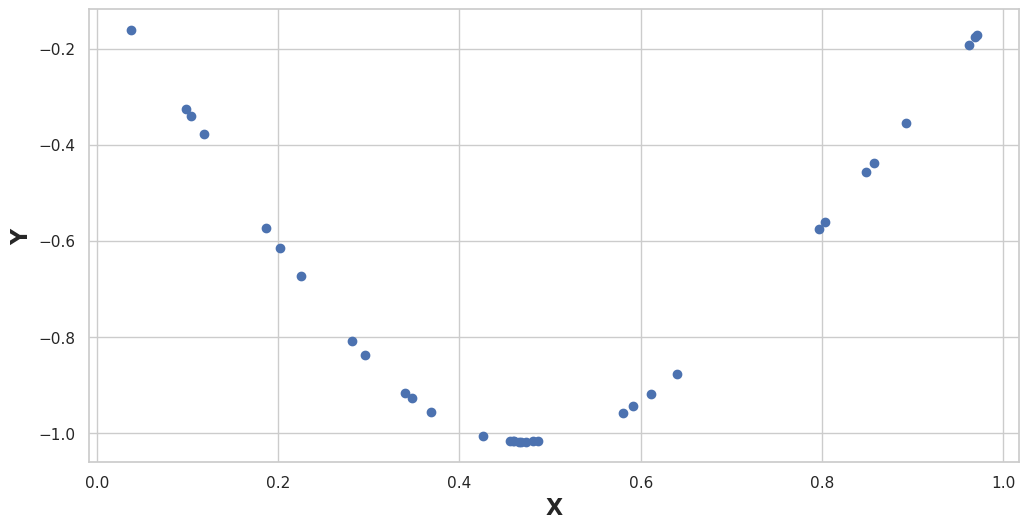

In [15]:
pred = model.predict(X_validation)
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(X_validation, pred, "ob", label="test")
plt.xlabel('X', weight="bold", fontsize=16)
plt.ylabel('Y', weight="bold", fontsize=16)

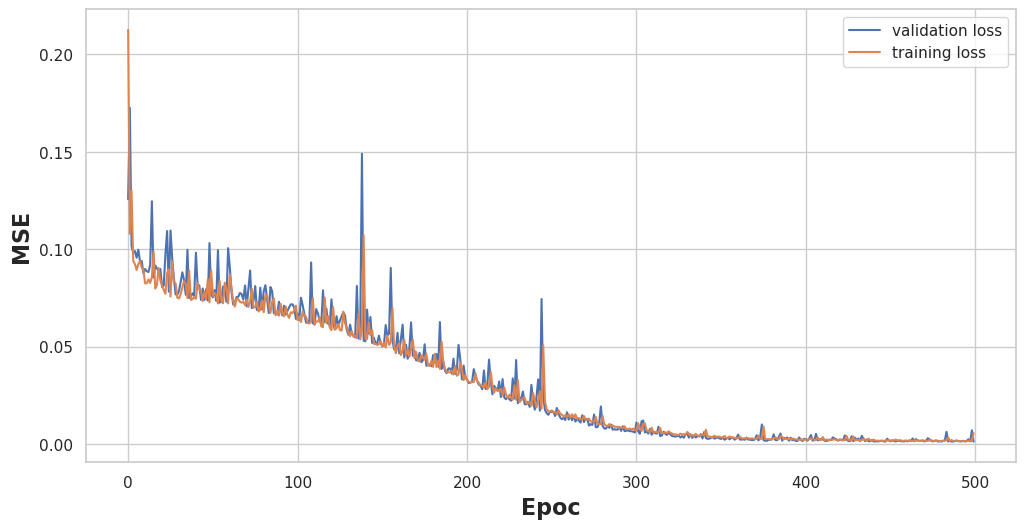

In [16]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(history.history["val_loss"], label="validation loss")
plt.plot(history.history["loss"], label="training loss")
plt.xlabel("Epoc", weight="bold", fontsize=16)
plt.ylabel("MSE", weight="bold", fontsize=16)
plt.legend()

## California dataset: Regresión

Ahora vamos con un [dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) más complicado, el dataset del precio medio por cuadra de casas en un distrito de california 

In [17]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
california = fetch_california_housing()
california_df = pd.DataFrame(california.data, columns=california.feature_names)

In [18]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [19]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

Las variables que contiene el dataset son:
    
* MedInc: ingreso medio de las personas que viven en esa cuadra
* HouseAge: edad media de las casas de esa cuadra
* AveRooms: número medio de ambientes
* AveBedrms número medio de habitaciones
* Population: cantidad de habitantes en la cuadra
* AveOccup: número medio de habitantes en la casa
* Latitude: latitud de la cuadra
* Longitude: longitud de la cuadra 


* MedHouseVal:valor medio de las casas.

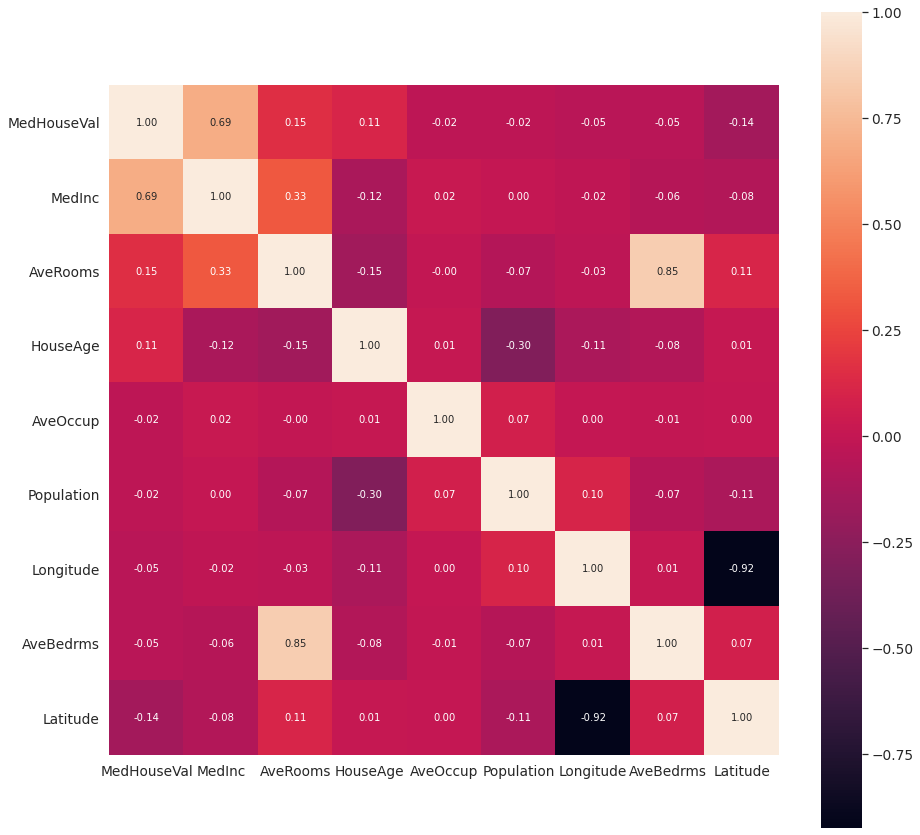

In [20]:
california_df['MedHouseVal'] = california.target
corrmat = california_df.corr()
k = 9  # number of variables for heatmap
cols = corrmat.nlargest(k, 'MedHouseVal')['MedHouseVal'].index
cm = np.corrcoef(california_df[cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(15, 15))
hm = sns.heatmap(
    cm,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 10},
    yticklabels=cols.values,
    xticklabels=cols.values,
)

plt.show()

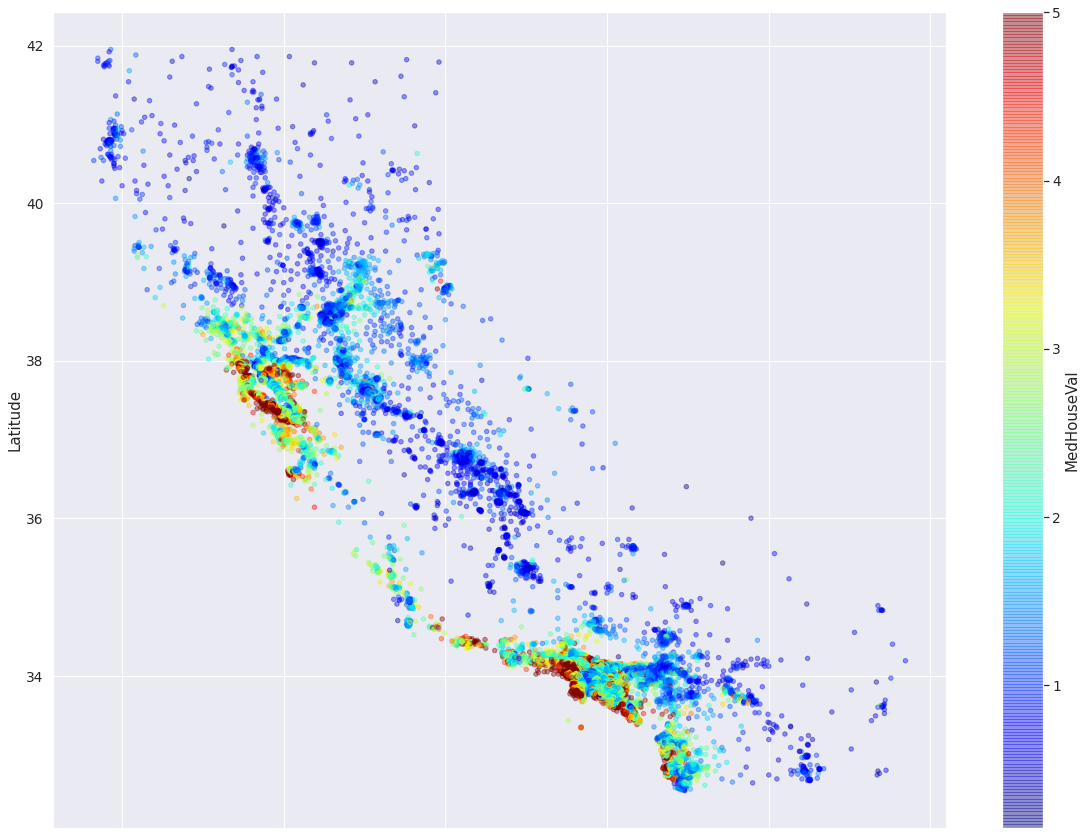

In [21]:
california_df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4, c="MedHouseVal", figsize=(20,15), cmap=plt.get_cmap("jet"), colorbar=True)

In [22]:
california_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Text(0, 0.5, 'Counts')

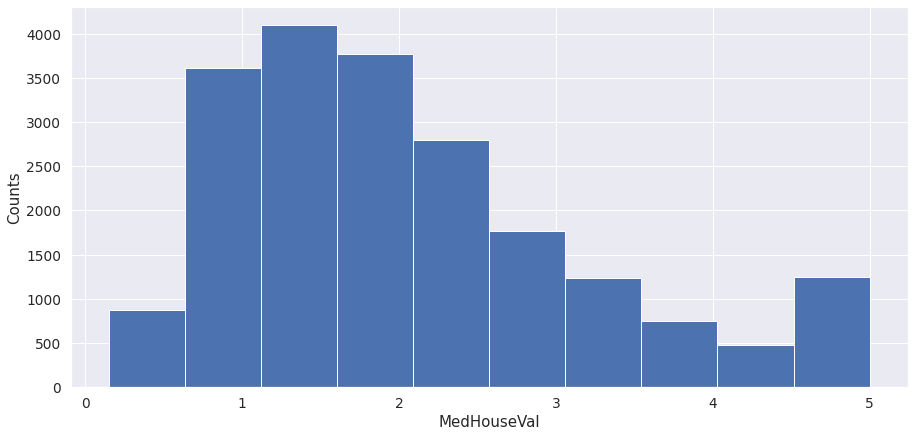

In [23]:
fig = plt.figure(figsize = (15,7))
california_df["MedHouseVal"].hist()
plt.xlabel("MedHouseVal")
plt.ylabel("Counts")

Vamos a usar el StandardScaler y luego empezar a entrenar modelos y ver qué onda. 

In [24]:
scaler = preprocessing.StandardScaler()
scaler.fit(california_df)
scaled_df = scaler.transform(california_df)
names = california_df.columns
scaled_california_df = pd.DataFrame(scaled_df, columns=names)

Entreno el modelo más simple: una regresión lineal

In [25]:
X = scaled_california_df.drop("MedHouseVal", axis=1)
y = scaled_california_df.filter(items=["MedHouseVal"])

linreg = LinearRegression()
rmse = np.sqrt(
    -cross_val_score(
        LinearRegression(), X, y, scoring="neg_mean_squared_error", cv=5
    )
)
rmse.mean()

0.6464066254204867

In [26]:
linreg = LinearRegression()
linreg.fit(X, y)
linreg.coef_[0]

array([ 0.71895227,  0.10291078, -0.23010693,  0.26491789, -0.00390232,
       -0.03408034, -0.77984545, -0.75441522])

Podemos ver la importancia tiene cada variable:

In [27]:
coeficientes = pd.DataFrame(
    {'Feature': X.columns, 'Beta': linreg.coef_[0]}, columns=['Feature', 'Beta']
)
coeficientes.sort_values(by=['Beta'])

,Feature,Beta
6,Latitude,-0.779845
7,Longitude,-0.754415
2,AveRooms,-0.230107
5,AveOccup,-0.034080
4,Population,-0.003902
1,HouseAge,0.102911
3,AveBedrms,0.264918
0,MedInc,0.718952


In [28]:
y_pred = linreg.predict(X)

(-3.0, 6.0)

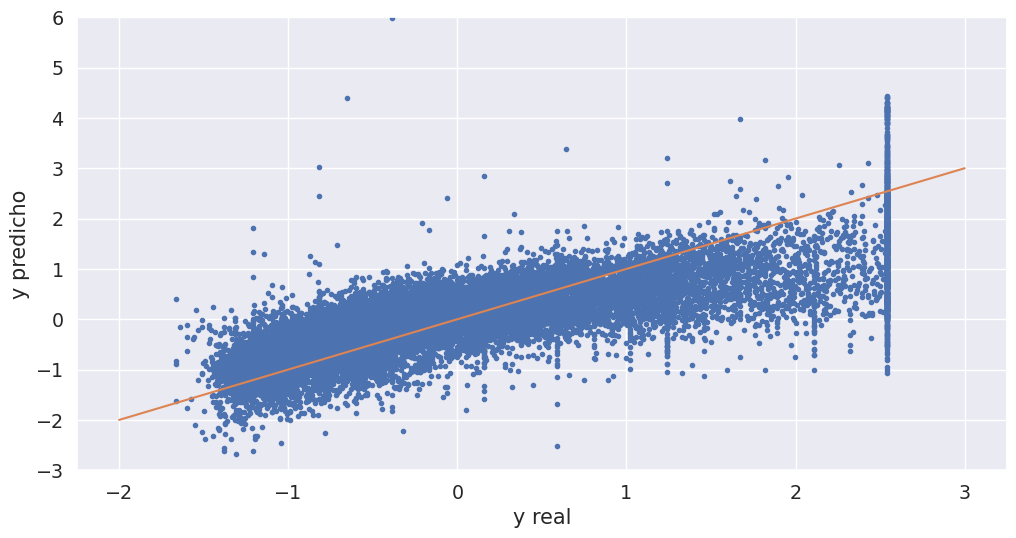

In [29]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(y, y_pred, ".")
plt.xlabel("y real")
plt.ylabel("y predicho")
plt.plot(range(-2,4), range(-2,4))
plt.ylim(-3,6)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [31]:
model = Sequential()

In [32]:
model.add(Dense(10,activation='tanh',input_shape=(8,)))
model.add(Dense(1,activation='linear'))

In [33]:
opt = keras.optimizers.SGD(lr=0.1)
model.compile(loss='mse',optimizer=opt)

Podemos usar .summary() para ver el modelo: capas, parámetros etc

In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [35]:
 history = model.fit(X_train.values ,y_train.values,epochs=100,validation_data=(X_test.values, y_test.values))

Train on 12384 samples, validate on 8256 samples
Epoch 1/100
12384/12384 [==============================] - 0s - loss: 0.3590 - val_loss: 0.3323
Epoch 2/100
12384/12384 [==============================] - 0s - loss: 0.3183 - val_loss: 0.3132
Epoch 3/100
12384/12384 [==============================] - 0s - loss: 0.3095 - val_loss: 0.3123
Epoch 4/100
12384/12384 [==============================] - 0s - loss: 0.3020 - val_loss: 0.3114
Epoch 5/100
12384/12384 [==============================] - 0s - loss: 0.2961 - val_loss: 0.3066
Epoch 6/100
12384/12384 [==============================] - 0s - loss: 0.2887 - val_loss: 0.2995
Epoch 7/100
12384/12384 [==============================] - 0s - loss: 0.2869 - val_loss: 0.2961
Epoch 8/100
12384/12384 [==============================] - 0s - loss: 0.2839 - val_loss: 0.2900
Epoch 9/100
12384/12384 [==============================] - 0s - loss: 0.2816 - val_loss: 0.2963
Epoch 10/100
12384/12384 [==============================] - 0s - loss: 0.2799 - val_los

12384/12384 [==============================] - 0s - loss: 0.2315 - val_loss: 0.2389
Epoch 86/100
12384/12384 [==============================] - 0s - loss: 0.2315 - val_loss: 0.2489
Epoch 87/100
12384/12384 [==============================] - 0s - loss: 0.2310 - val_loss: 0.2440
Epoch 88/100
12384/12384 [==============================] - 0s - loss: 0.2306 - val_loss: 0.2343
Epoch 89/100
12384/12384 [==============================] - 0s - loss: 0.2316 - val_loss: 0.2400
Epoch 90/100
12384/12384 [==============================] - 0s - loss: 0.2310 - val_loss: 0.2441
Epoch 91/100
12384/12384 [==============================] - 0s - loss: 0.2297 - val_loss: 0.2588
Epoch 92/100
12384/12384 [==============================] - 0s - loss: 0.2310 - val_loss: 0.2519
Epoch 93/100
12384/12384 [==============================] - 0s - loss: 0.2306 - val_loss: 0.2602
Epoch 94/100
12384/12384 [==============================] - 0s - loss: 0.2298 - val_loss: 0.2348
Epoch 95/100
12384/12384 [=================

In [36]:
y_pred_nn = model.predict(X_test.values)

(-3.0, 6.0)

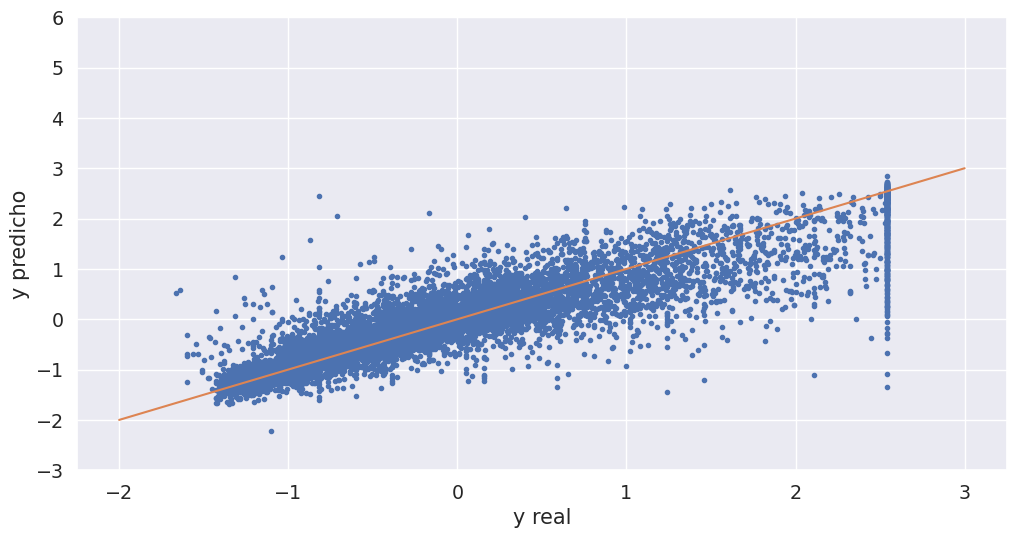

In [37]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(y_test, y_pred_nn, ".")
plt.plot(range(-2,4), range(-2,4))
plt.xlabel("y real")
plt.ylabel("y predicho")
plt.ylim(-3,6)

In [38]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])

Ahora ploteamos el rmse del validation y training por época

Text(0.5, 0, 'Época')

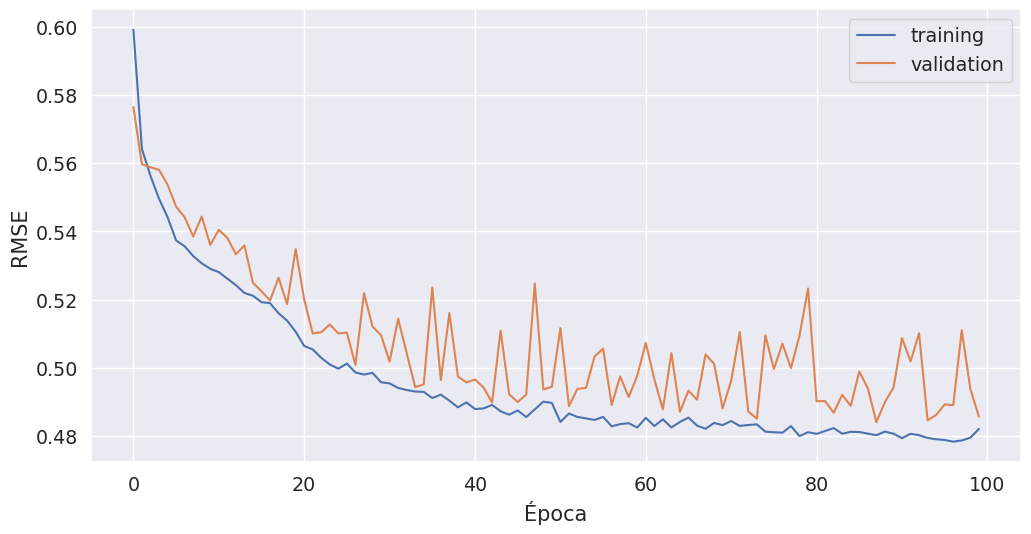

In [39]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss, label="training")
plt.plot(val_loss, label="validation")
plt.legend()
plt.ylabel("RMSE")
plt.xlabel("Época")

Vemos que salta bastante la loss durante el entrenamiento: 

Qué podemos hacer para que salte menos? Qué es lo que controla la "velocidad del aprendizaje"?

Podemos bajar la tasa de aprendizaje 

In [40]:
model = Sequential()
model.add(Dense(10,activation='tanh',input_shape=(8,)))
model.add(Dense(1,activation='linear'))
opt = keras.optimizers.SGD(lr=0.05)
model.compile(loss='mse',optimizer=opt)

In [41]:
history = model.fit(X_train.values ,y_train.values,epochs=200,validation_data=(X_test.values, y_test.values))

Train on 12384 samples, validate on 8256 samples
Epoch 1/200
12384/12384 [==============================] - 0s - loss: 0.4057 - val_loss: 0.3696
Epoch 2/200
12384/12384 [==============================] - 0s - loss: 0.3322 - val_loss: 0.3373
Epoch 3/200
12384/12384 [==============================] - 0s - loss: 0.3152 - val_loss: 0.3246
Epoch 4/200
12384/12384 [==============================] - 0s - loss: 0.3064 - val_loss: 0.3130
Epoch 5/200
12384/12384 [==============================] - 0s - loss: 0.3014 - val_loss: 0.3095
Epoch 6/200
12384/12384 [==============================] - 0s - loss: 0.2966 - val_loss: 0.3121
Epoch 7/200
12384/12384 [==============================] - 0s - loss: 0.2947 - val_loss: 0.3009
Epoch 8/200
12384/12384 [==============================] - 0s - loss: 0.2920 - val_loss: 0.3060
Epoch 9/200
12384/12384 [==============================] - 0s - loss: 0.2886 - val_loss: 0.3083
Epoch 10/200
12384/12384 [==============================] - 0s - loss: 0.2871 - val_los

12384/12384 [==============================] - 0s - loss: 0.2407 - val_loss: 0.2547
Epoch 86/200
12384/12384 [==============================] - 0s - loss: 0.2414 - val_loss: 0.2575
Epoch 87/200
12384/12384 [==============================] - 0s - loss: 0.2444 - val_loss: 0.2519
Epoch 88/200
12384/12384 [==============================] - 0s - loss: 0.2404 - val_loss: 0.2520
Epoch 89/200
12384/12384 [==============================] - 0s - loss: 0.2390 - val_loss: 0.2564
Epoch 90/200
12384/12384 [==============================] - 0s - loss: 0.2403 - val_loss: 0.2491
Epoch 91/200
12384/12384 [==============================] - 0s - loss: 0.2410 - val_loss: 0.2633
Epoch 92/200
12384/12384 [==============================] - 0s - loss: 0.2438 - val_loss: 0.2525
Epoch 93/200
12384/12384 [==============================] - 0s - loss: 0.2408 - val_loss: 0.2557
Epoch 94/200
12384/12384 [==============================] - 0s - loss: 0.2404 - val_loss: 0.2502
Epoch 95/200
12384/12384 [=================

12384/12384 [==============================] - 0s - loss: 0.2374 - val_loss: 0.2500
Epoch 169/200
12384/12384 [==============================] - 0s - loss: 0.2375 - val_loss: 0.2469
Epoch 170/200
12384/12384 [==============================] - 0s - loss: 0.2340 - val_loss: 0.2497
Epoch 171/200
12384/12384 [==============================] - 0s - loss: 0.2363 - val_loss: 0.2443
Epoch 172/200
12384/12384 [==============================] - 0s - loss: 0.2339 - val_loss: 0.2472
Epoch 173/200
12384/12384 [==============================] - 0s - loss: 0.2338 - val_loss: 0.2468
Epoch 174/200
12384/12384 [==============================] - 0s - loss: 0.2346 - val_loss: 0.2436
Epoch 175/200
12384/12384 [==============================] - 0s - loss: 0.2405 - val_loss: 0.2565
Epoch 176/200
12384/12384 [==============================] - 0s - loss: 0.2358 - val_loss: 0.2451
Epoch 177/200
12384/12384 [==============================] - 0s - loss: 0.2355 - val_loss: 0.2466
Epoch 178/200
12384/12384 [=======

Text(0.5, 0, 'Época')

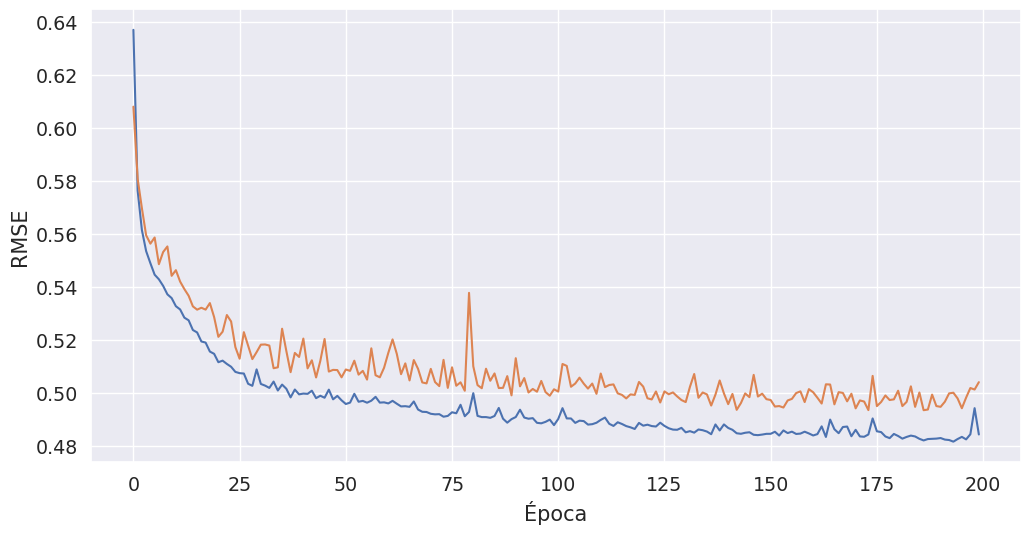

In [42]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")

Vemos que es un poco menos errático el aprendizaje, qué otra cosa podemos hacer para mejorar el entrenamiento como tal:

Hint: Qué cosa se encarga de modificar los pesos una vez calculados los gradientes?

Probamos cambiar el [optmizador](https://keras.io/api/optimizers/) a uno mejor:

mejor==no usar solo el gradiente. Usamos Adam de optmizador

In [43]:
model = Sequential()
model.add(Dense(10,activation='tanh',input_shape=(8,)))
model.add(Dense(1,activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse',optimizer=opt)

In [44]:
history = model.fit(X_train.values ,y_train.values,epochs=200,validation_data=(X_test.values, y_test.values))

Train on 12384 samples, validate on 8256 samples
Epoch 1/200
12384/12384 [==============================] - 0s - loss: 0.6801 - val_loss: 0.4044
Epoch 2/200
12384/12384 [==============================] - 0s - loss: 0.3632 - val_loss: 0.3484
Epoch 3/200
12384/12384 [==============================] - 1s - loss: 0.3339 - val_loss: 0.3339
Epoch 4/200
12384/12384 [==============================] - 0s - loss: 0.3242 - val_loss: 0.3269
Epoch 5/200
12384/12384 [==============================] - 0s - loss: 0.3179 - val_loss: 0.3209
Epoch 6/200
12384/12384 [==============================] - 0s - loss: 0.3125 - val_loss: 0.3167
Epoch 7/200
12384/12384 [==============================] - 0s - loss: 0.3082 - val_loss: 0.3129
Epoch 8/200
12384/12384 [==============================] - 0s - loss: 0.3044 - val_loss: 0.3085
Epoch 9/200
12384/12384 [==============================] - 0s - loss: 0.3006 - val_loss: 0.3064
Epoch 10/200
12384/12384 [==============================] - 0s - loss: 0.2978 - val_los

12384/12384 [==============================] - 0s - loss: 0.2477 - val_loss: 0.2600
Epoch 86/200
12384/12384 [==============================] - 0s - loss: 0.2478 - val_loss: 0.2599
Epoch 87/200
12384/12384 [==============================] - 0s - loss: 0.2473 - val_loss: 0.2603
Epoch 88/200
12384/12384 [==============================] - 0s - loss: 0.2470 - val_loss: 0.2584
Epoch 89/200
12384/12384 [==============================] - 0s - loss: 0.2470 - val_loss: 0.2603
Epoch 90/200
12384/12384 [==============================] - 0s - loss: 0.2466 - val_loss: 0.2605
Epoch 91/200
12384/12384 [==============================] - 0s - loss: 0.2465 - val_loss: 0.2583
Epoch 92/200
12384/12384 [==============================] - 0s - loss: 0.2468 - val_loss: 0.2582
Epoch 93/200
12384/12384 [==============================] - 0s - loss: 0.2461 - val_loss: 0.2583
Epoch 94/200
12384/12384 [==============================] - 0s - loss: 0.2461 - val_loss: 0.2594
Epoch 95/200
12384/12384 [=================

12384/12384 [==============================] - 0s - loss: 0.2350 - val_loss: 0.2486
Epoch 169/200
12384/12384 [==============================] - 0s - loss: 0.2355 - val_loss: 0.2488
Epoch 170/200
12384/12384 [==============================] - 0s - loss: 0.2349 - val_loss: 0.2493
Epoch 171/200
12384/12384 [==============================] - 0s - loss: 0.2352 - val_loss: 0.2476
Epoch 172/200
12384/12384 [==============================] - 0s - loss: 0.2345 - val_loss: 0.2503
Epoch 173/200
12384/12384 [==============================] - 0s - loss: 0.2351 - val_loss: 0.2471
Epoch 174/200
12384/12384 [==============================] - 0s - loss: 0.2348 - val_loss: 0.2477
Epoch 175/200
12384/12384 [==============================] - 0s - loss: 0.2345 - val_loss: 0.2478
Epoch 176/200
12384/12384 [==============================] - 0s - loss: 0.2346 - val_loss: 0.2467
Epoch 177/200
12384/12384 [==============================] - 0s - loss: 0.2344 - val_loss: 0.2474
Epoch 178/200
12384/12384 [=======

No handles with labels found to put in legend.


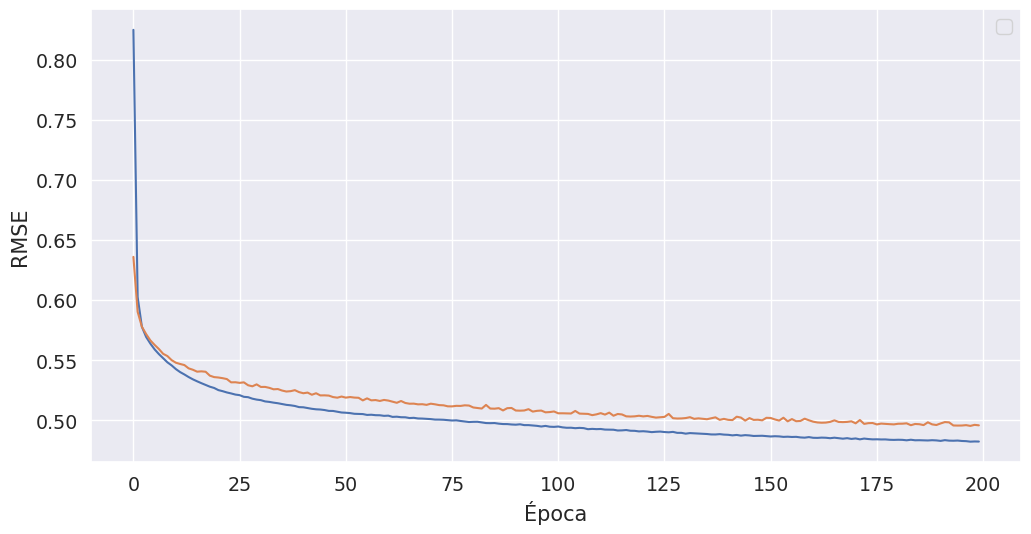

In [45]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

Vemos que el aprendizaje es mucho menos errático.

Ahora intentemos complejizar el modelo agregando una capa más

In [46]:
model = Sequential()
model.add(Dense(10,activation='tanh',input_shape=(8,)))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1,activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse',optimizer=opt)

In [47]:
 history = model.fit(X_train.values ,y_train.values,epochs=100,validation_data=(X_test.values, y_test.values))

Train on 12384 samples, validate on 8256 samples
Epoch 1/100
12384/12384 [==============================] - 0s - loss: 0.5977 - val_loss: 0.3686
Epoch 2/100
12384/12384 [==============================] - 0s - loss: 0.3421 - val_loss: 0.3399
Epoch 3/100
12384/12384 [==============================] - 0s - loss: 0.3227 - val_loss: 0.3255
Epoch 4/100
12384/12384 [==============================] - 0s - loss: 0.3083 - val_loss: 0.3083
Epoch 5/100
12384/12384 [==============================] - 0s - loss: 0.2966 - val_loss: 0.2990
Epoch 6/100
12384/12384 [==============================] - 0s - loss: 0.2875 - val_loss: 0.2921
Epoch 7/100
12384/12384 [==============================] - 0s - loss: 0.2805 - val_loss: 0.2915
Epoch 8/100
12384/12384 [==============================] - 0s - loss: 0.2753 - val_loss: 0.2857
Epoch 9/100
12384/12384 [==============================] - 0s - loss: 0.2704 - val_loss: 0.2787
Epoch 10/100
12384/12384 [==============================] - 0s - loss: 0.2663 - val_los

12384/12384 [==============================] - 0s - loss: 0.2166 - val_loss: 0.2350
Epoch 86/100
12384/12384 [==============================] - 0s - loss: 0.2164 - val_loss: 0.2345
Epoch 87/100
12384/12384 [==============================] - 0s - loss: 0.2170 - val_loss: 0.2366
Epoch 88/100
12384/12384 [==============================] - 0s - loss: 0.2164 - val_loss: 0.2348
Epoch 89/100
12384/12384 [==============================] - 0s - loss: 0.2159 - val_loss: 0.2360
Epoch 90/100
12384/12384 [==============================] - 0s - loss: 0.2166 - val_loss: 0.2336
Epoch 91/100
12384/12384 [==============================] - 0s - loss: 0.2157 - val_loss: 0.2329
Epoch 92/100
12384/12384 [==============================] - 0s - loss: 0.2161 - val_loss: 0.2342
Epoch 93/100
12384/12384 [==============================] - 0s - loss: 0.2155 - val_loss: 0.2358
Epoch 94/100
12384/12384 [==============================] - 0s - loss: 0.2153 - val_loss: 0.2338
Epoch 95/100
12384/12384 [=================

No handles with labels found to put in legend.


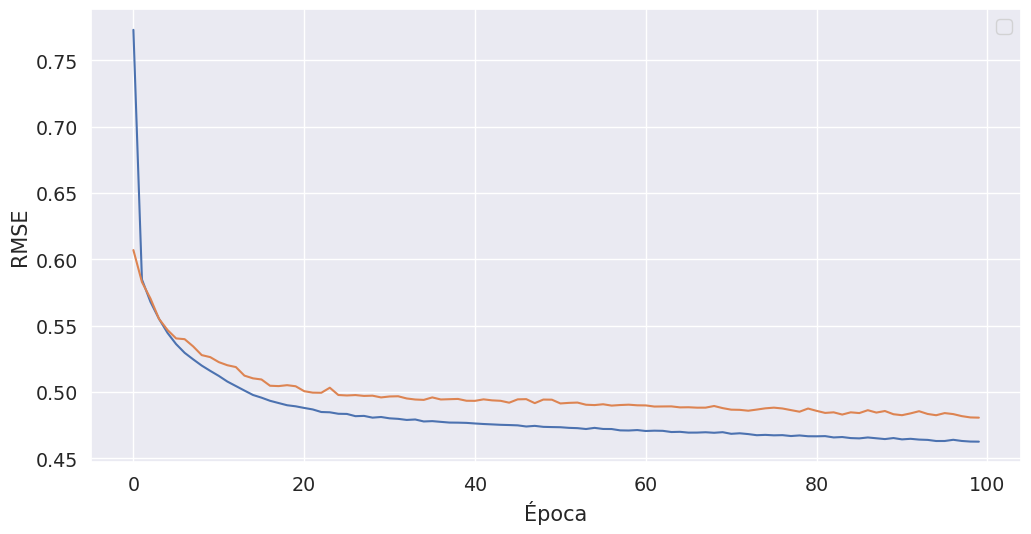

In [48]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

In [49]:
california_df_ld = pd.DataFrame(california.data, columns=california.feature_names)

Voy a tomar menos datos y voy a agregar más parámetros a mi red: Qué puede pasar cuando tengo menos cantidad de datos y más cantidad de parámetros a entrenar? Qué puede malir sal?

In [50]:
X = scaled_california_df[0:10000].drop("MedHouseVal", axis=1)
y = scaled_california_df[0:10000].filter(items=["MedHouseVal"])

In [51]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.4, random_state=42)

In [52]:
model = Sequential()
model.add(Dense(50,activation='tanh',input_shape=(8,)))
model.add(Dense(20,activation='tanh'))
model.add(Dense(1,activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse',optimizer=opt)

In [53]:
 history = model.fit(X_train.values ,y_train.values,epochs=500,validation_data=(X_validation.values, y_validation.values))

Train on 6000 samples, validate on 4000 samples
Epoch 1/500
6000/6000 [==============================] - 0s - loss: 0.4706 - val_loss: 0.3413
Epoch 2/500
6000/6000 [==============================] - 0s - loss: 0.3409 - val_loss: 0.3170
Epoch 3/500
6000/6000 [==============================] - 0s - loss: 0.3268 - val_loss: 0.3039
Epoch 4/500
6000/6000 [==============================] - 0s - loss: 0.3134 - val_loss: 0.2977
Epoch 5/500
6000/6000 [==============================] - 0s - loss: 0.3038 - val_loss: 0.2847
Epoch 6/500
6000/6000 [==============================] - 0s - loss: 0.2941 - val_loss: 0.2737
Epoch 7/500
6000/6000 [==============================] - 0s - loss: 0.2804 - val_loss: 0.2673
Epoch 8/500
6000/6000 [==============================] - 0s - loss: 0.2688 - val_loss: 0.2602
Epoch 9/500
6000/6000 [==============================] - 0s - loss: 0.2614 - val_loss: 0.2529
Epoch 10/500
6000/6000 [==============================] - 0s - loss: 0.2535 - val_loss: 0.2513
Epoch 11/50

6000/6000 [==============================] - 0s - loss: 0.1827 - val_loss: 0.2004
Epoch 87/500
6000/6000 [==============================] - 0s - loss: 0.1825 - val_loss: 0.2046
Epoch 88/500
6000/6000 [==============================] - 0s - loss: 0.1815 - val_loss: 0.1982
Epoch 89/500
6000/6000 [==============================] - 0s - loss: 0.1799 - val_loss: 0.1967
Epoch 90/500
6000/6000 [==============================] - 0s - loss: 0.1804 - val_loss: 0.2004
Epoch 91/500
6000/6000 [==============================] - 0s - loss: 0.1789 - val_loss: 0.2036
Epoch 92/500
6000/6000 [==============================] - 0s - loss: 0.1800 - val_loss: 0.1959
Epoch 93/500
6000/6000 [==============================] - 0s - loss: 0.1784 - val_loss: 0.2005
Epoch 94/500
6000/6000 [==============================] - 0s - loss: 0.1786 - val_loss: 0.1962
Epoch 95/500
6000/6000 [==============================] - 0s - loss: 0.1764 - val_loss: 0.1990
Epoch 96/500
6000/6000 [==============================] - 0s - 

6000/6000 [==============================] - 0s - loss: 0.1600 - val_loss: 0.1873
Epoch 172/500
6000/6000 [==============================] - 0s - loss: 0.1601 - val_loss: 0.1917
Epoch 173/500
6000/6000 [==============================] - 0s - loss: 0.1597 - val_loss: 0.1915
Epoch 174/500
6000/6000 [==============================] - 0s - loss: 0.1594 - val_loss: 0.1855
Epoch 175/500
6000/6000 [==============================] - 0s - loss: 0.1594 - val_loss: 0.1916
Epoch 176/500
6000/6000 [==============================] - 0s - loss: 0.1588 - val_loss: 0.1867
Epoch 177/500
6000/6000 [==============================] - 0s - loss: 0.1593 - val_loss: 0.1873
Epoch 178/500
6000/6000 [==============================] - 0s - loss: 0.1589 - val_loss: 0.1908
Epoch 179/500
6000/6000 [==============================] - 0s - loss: 0.1602 - val_loss: 0.1887
Epoch 180/500
6000/6000 [==============================] - 0s - loss: 0.1587 - val_loss: 0.1843
Epoch 181/500
6000/6000 [=============================

6000/6000 [==============================] - 0s - loss: 0.1469 - val_loss: 0.1838
Epoch 257/500
6000/6000 [==============================] - 0s - loss: 0.1495 - val_loss: 0.1885
Epoch 258/500
6000/6000 [==============================] - 0s - loss: 0.1483 - val_loss: 0.1846
Epoch 259/500
6000/6000 [==============================] - 0s - loss: 0.1478 - val_loss: 0.1844
Epoch 260/500
6000/6000 [==============================] - 0s - loss: 0.1479 - val_loss: 0.1939
Epoch 261/500
6000/6000 [==============================] - 0s - loss: 0.1480 - val_loss: 0.1869
Epoch 262/500
6000/6000 [==============================] - 0s - loss: 0.1476 - val_loss: 0.1863
Epoch 263/500
6000/6000 [==============================] - 0s - loss: 0.1480 - val_loss: 0.1885
Epoch 264/500
6000/6000 [==============================] - 0s - loss: 0.1467 - val_loss: 0.1834
Epoch 265/500
6000/6000 [==============================] - 0s - loss: 0.1474 - val_loss: 0.1947
Epoch 266/500
6000/6000 [=============================

6000/6000 [==============================] - 0s - loss: 0.1399 - val_loss: 0.1882
Epoch 342/500
6000/6000 [==============================] - 0s - loss: 0.1381 - val_loss: 0.1866
Epoch 343/500
6000/6000 [==============================] - 0s - loss: 0.1397 - val_loss: 0.1849
Epoch 344/500
6000/6000 [==============================] - 0s - loss: 0.1385 - val_loss: 0.1843
Epoch 345/500
6000/6000 [==============================] - 0s - loss: 0.1391 - val_loss: 0.1866
Epoch 346/500
6000/6000 [==============================] - 0s - loss: 0.1388 - val_loss: 0.1850
Epoch 347/500
6000/6000 [==============================] - 0s - loss: 0.1388 - val_loss: 0.1823
Epoch 348/500
6000/6000 [==============================] - 0s - loss: 0.1388 - val_loss: 0.1864
Epoch 349/500
6000/6000 [==============================] - 0s - loss: 0.1392 - val_loss: 0.1850
Epoch 350/500
6000/6000 [==============================] - 0s - loss: 0.1378 - val_loss: 0.1862
Epoch 351/500
6000/6000 [=============================

6000/6000 [==============================] - 0s - loss: 0.1325 - val_loss: 0.1921
Epoch 427/500
6000/6000 [==============================] - 0s - loss: 0.1327 - val_loss: 0.1878
Epoch 428/500
6000/6000 [==============================] - 0s - loss: 0.1326 - val_loss: 0.1837
Epoch 429/500
6000/6000 [==============================] - 0s - loss: 0.1325 - val_loss: 0.1880
Epoch 430/500
6000/6000 [==============================] - 0s - loss: 0.1327 - val_loss: 0.1858
Epoch 431/500
6000/6000 [==============================] - 0s - loss: 0.1319 - val_loss: 0.1897
Epoch 432/500
6000/6000 [==============================] - 0s - loss: 0.1338 - val_loss: 0.1957
Epoch 433/500
6000/6000 [==============================] - 0s - loss: 0.1328 - val_loss: 0.1855
Epoch 434/500
6000/6000 [==============================] - 0s - loss: 0.1321 - val_loss: 0.1865
Epoch 435/500
6000/6000 [==============================] - 0s - loss: 0.1320 - val_loss: 0.1877
Epoch 436/500
6000/6000 [=============================

Text(0, 0.5, 'y pred')

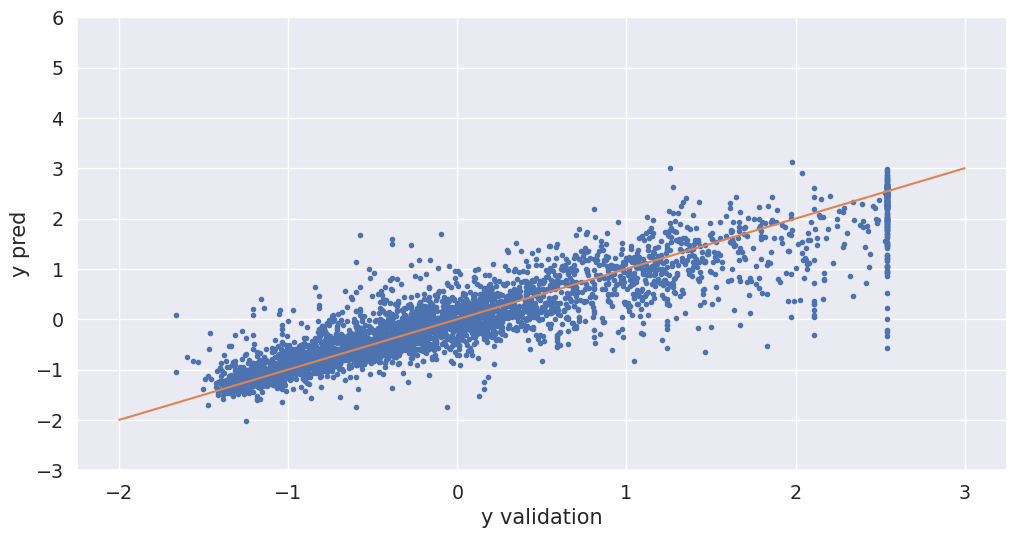

In [55]:
y_pred_nn = model.predict(X_validation.values)
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(y_validation, y_pred_nn, ".")
plt.plot(range(-2,4), range(-2,4))
plt.ylim(-3,6)
plt.xlabel("y validation")
plt.ylabel("y pred")

No handles with labels found to put in legend.


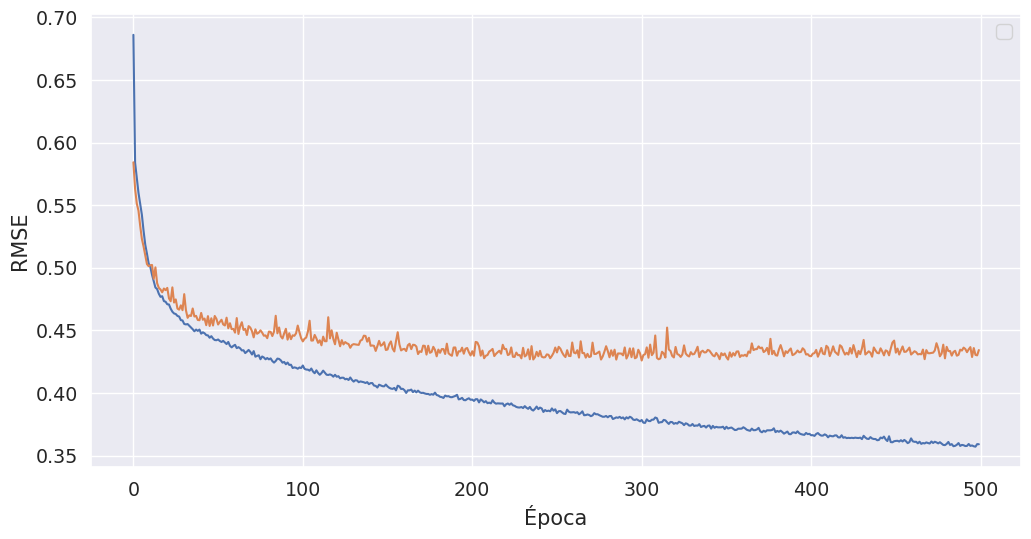

In [56]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

Que pasa si agregamos muchas neuronas?

In [57]:
model = Sequential()
model.add(Dense(100,activation='relu',input_shape=(8,)))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse',optimizer=opt)

In [58]:
history = model.fit(X_train.values ,y_train.values,epochs=500,validation_data=(X_validation.values, y_validation.values))

Train on 6000 samples, validate on 4000 samples
Epoch 1/500
6000/6000 [==============================] - 0s - loss: 0.4814 - val_loss: 0.3382
Epoch 2/500
6000/6000 [==============================] - 0s - loss: 0.3614 - val_loss: 0.3103
Epoch 3/500
6000/6000 [==============================] - 0s - loss: 0.3715 - val_loss: 0.2549
Epoch 4/500
6000/6000 [==============================] - 0s - loss: 0.2671 - val_loss: 0.2388
Epoch 5/500
6000/6000 [==============================] - 0s - loss: 0.2458 - val_loss: 0.2406
Epoch 6/500
6000/6000 [==============================] - 0s - loss: 0.2302 - val_loss: 0.2294
Epoch 7/500
6000/6000 [==============================] - 0s - loss: 0.2244 - val_loss: 0.2284
Epoch 8/500
6000/6000 [==============================] - 0s - loss: 0.2284 - val_loss: 0.2256
Epoch 9/500
6000/6000 [==============================] - 0s - loss: 0.2203 - val_loss: 0.2306
Epoch 10/500
6000/6000 [==============================] - 0s - loss: 0.2118 - val_loss: 0.2231
Epoch 11/50

6000/6000 [==============================] - 0s - loss: 0.1458 - val_loss: 0.1846
Epoch 87/500
6000/6000 [==============================] - 0s - loss: 0.1431 - val_loss: 0.1835
Epoch 88/500
6000/6000 [==============================] - 0s - loss: 0.1442 - val_loss: 0.1932
Epoch 89/500
6000/6000 [==============================] - 0s - loss: 0.1438 - val_loss: 0.1877
Epoch 90/500
6000/6000 [==============================] - 0s - loss: 0.1419 - val_loss: 0.1862
Epoch 91/500
6000/6000 [==============================] - 0s - loss: 0.1415 - val_loss: 0.2146
Epoch 92/500
6000/6000 [==============================] - 0s - loss: 0.1426 - val_loss: 0.1905
Epoch 93/500
6000/6000 [==============================] - 0s - loss: 0.1413 - val_loss: 0.1857
Epoch 94/500
6000/6000 [==============================] - 0s - loss: 0.1408 - val_loss: 0.1835
Epoch 95/500
6000/6000 [==============================] - 0s - loss: 0.1391 - val_loss: 0.1887
Epoch 96/500
6000/6000 [==============================] - 0s - 

6000/6000 [==============================] - 0s - loss: 0.1138 - val_loss: 0.1988
Epoch 172/500
6000/6000 [==============================] - 0s - loss: 0.1124 - val_loss: 0.1884
Epoch 173/500
6000/6000 [==============================] - 0s - loss: 0.1130 - val_loss: 0.1928
Epoch 174/500
6000/6000 [==============================] - 0s - loss: 0.1131 - val_loss: 0.1941
Epoch 175/500
6000/6000 [==============================] - 0s - loss: 0.1127 - val_loss: 0.1910
Epoch 176/500
6000/6000 [==============================] - 0s - loss: 0.1103 - val_loss: 0.1990
Epoch 177/500
6000/6000 [==============================] - 0s - loss: 0.1108 - val_loss: 0.1890
Epoch 178/500
6000/6000 [==============================] - 0s - loss: 0.1116 - val_loss: 0.1958
Epoch 179/500
6000/6000 [==============================] - 0s - loss: 0.1125 - val_loss: 0.1887
Epoch 180/500
6000/6000 [==============================] - 0s - loss: 0.1130 - val_loss: 0.1928
Epoch 181/500
6000/6000 [=============================

6000/6000 [==============================] - 0s - loss: 0.0959 - val_loss: 0.1993
Epoch 257/500
6000/6000 [==============================] - 0s - loss: 0.0918 - val_loss: 0.2121
Epoch 258/500
6000/6000 [==============================] - 0s - loss: 0.0943 - val_loss: 0.2116
Epoch 259/500
6000/6000 [==============================] - 0s - loss: 0.0930 - val_loss: 0.2086
Epoch 260/500
6000/6000 [==============================] - 0s - loss: 0.0934 - val_loss: 0.2018
Epoch 261/500
6000/6000 [==============================] - 0s - loss: 0.0952 - val_loss: 0.2129
Epoch 262/500
6000/6000 [==============================] - 0s - loss: 0.0930 - val_loss: 0.2057
Epoch 263/500
6000/6000 [==============================] - 0s - loss: 0.0929 - val_loss: 0.2032
Epoch 264/500
6000/6000 [==============================] - 0s - loss: 0.0942 - val_loss: 0.2098
Epoch 265/500
6000/6000 [==============================] - 0s - loss: 0.0908 - val_loss: 0.2056
Epoch 266/500
6000/6000 [=============================

6000/6000 [==============================] - 0s - loss: 0.0817 - val_loss: 0.2126
Epoch 342/500
6000/6000 [==============================] - 0s - loss: 0.0808 - val_loss: 0.2093
Epoch 343/500
6000/6000 [==============================] - 0s - loss: 0.0818 - val_loss: 0.2059
Epoch 344/500
6000/6000 [==============================] - 0s - loss: 0.0804 - val_loss: 0.2127
Epoch 345/500
6000/6000 [==============================] - 0s - loss: 0.0818 - val_loss: 0.2131
Epoch 346/500
6000/6000 [==============================] - 0s - loss: 0.0814 - val_loss: 0.2169
Epoch 347/500
6000/6000 [==============================] - 0s - loss: 0.0808 - val_loss: 0.2241
Epoch 348/500
6000/6000 [==============================] - 0s - loss: 0.0821 - val_loss: 0.2093
Epoch 349/500
6000/6000 [==============================] - 0s - loss: 0.0826 - val_loss: 0.2225
Epoch 350/500
6000/6000 [==============================] - 0s - loss: 0.0795 - val_loss: 0.2125
Epoch 351/500
6000/6000 [=============================

6000/6000 [==============================] - 0s - loss: 0.0740 - val_loss: 0.2210
Epoch 427/500
6000/6000 [==============================] - 0s - loss: 0.0740 - val_loss: 0.2207
Epoch 428/500
6000/6000 [==============================] - 0s - loss: 0.0728 - val_loss: 0.2304
Epoch 429/500
6000/6000 [==============================] - 0s - loss: 0.0743 - val_loss: 0.2250
Epoch 430/500
6000/6000 [==============================] - 0s - loss: 0.0722 - val_loss: 0.2209
Epoch 431/500
6000/6000 [==============================] - 0s - loss: 0.0719 - val_loss: 0.2223
Epoch 432/500
6000/6000 [==============================] - 0s - loss: 0.0742 - val_loss: 0.2343
Epoch 433/500
6000/6000 [==============================] - 0s - loss: 0.0710 - val_loss: 0.2331
Epoch 434/500
6000/6000 [==============================] - 0s - loss: 0.0729 - val_loss: 0.2253
Epoch 435/500
6000/6000 [==============================] - 0s - loss: 0.0725 - val_loss: 0.2277
Epoch 436/500
6000/6000 [=============================

No handles with labels found to put in legend.


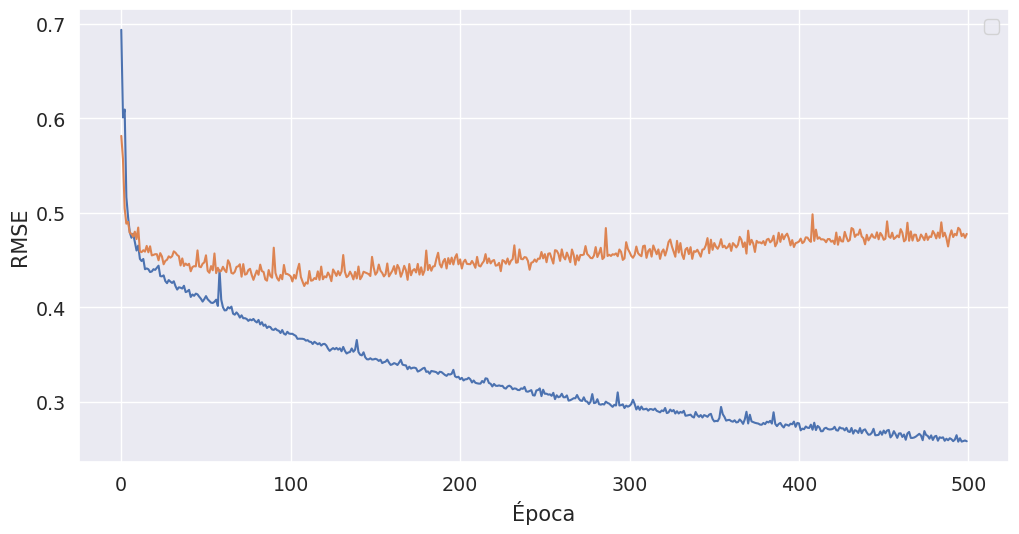

In [59]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

Aca ya directamente a partir de un punto empieza a desaprender las cosas útiles que aprendió.

Como podemos solucionar este problema? Qué métodos vimos para mejorar la generalización del modelo?

Probamos el método de [Dropout](https://keras.io/api/layers/regularization_layers/dropout/) primero con el modelo anterior con muchas neuronas:

In [60]:
model = Sequential()
model.add(Dense(100,activation='relu',input_shape=(8,)))
model.add(Dropout(0.25))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse',optimizer=opt)

In [61]:
history = model.fit(X_train.values ,y_train.values,epochs=500,validation_data=(X_validation.values, y_validation.values))

Train on 6000 samples, validate on 4000 samples
Epoch 1/500
6000/6000 [==============================] - 0s - loss: 0.6961 - val_loss: 0.3882
Epoch 2/500
6000/6000 [==============================] - 0s - loss: 0.4716 - val_loss: 0.3366
Epoch 3/500
6000/6000 [==============================] - 0s - loss: 0.4249 - val_loss: 0.3153
Epoch 4/500
6000/6000 [==============================] - 0s - loss: 0.3826 - val_loss: 0.2845
Epoch 5/500
6000/6000 [==============================] - 0s - loss: 0.3714 - val_loss: 0.2704
Epoch 6/500
6000/6000 [==============================] - 0s - loss: 0.3245 - val_loss: 0.2582
Epoch 7/500
6000/6000 [==============================] - 0s - loss: 0.2995 - val_loss: 0.2495
Epoch 8/500
6000/6000 [==============================] - 0s - loss: 0.3098 - val_loss: 0.2523
Epoch 9/500
6000/6000 [==============================] - 0s - loss: 0.2926 - val_loss: 0.2391
Epoch 10/500
6000/6000 [==============================] - 0s - loss: 0.2870 - val_loss: 0.2396
Epoch 11/50

6000/6000 [==============================] - 0s - loss: 0.2085 - val_loss: 0.1936
Epoch 87/500
6000/6000 [==============================] - 0s - loss: 0.2029 - val_loss: 0.1943
Epoch 88/500
6000/6000 [==============================] - 0s - loss: 0.2045 - val_loss: 0.1903
Epoch 89/500
6000/6000 [==============================] - 0s - loss: 0.2054 - val_loss: 0.1897
Epoch 90/500
6000/6000 [==============================] - 0s - loss: 0.2041 - val_loss: 0.1952
Epoch 91/500
6000/6000 [==============================] - 0s - loss: 0.2025 - val_loss: 0.1908
Epoch 92/500
6000/6000 [==============================] - 0s - loss: 0.2042 - val_loss: 0.1974
Epoch 93/500
6000/6000 [==============================] - 0s - loss: 0.2032 - val_loss: 0.1935
Epoch 94/500
6000/6000 [==============================] - 0s - loss: 0.2020 - val_loss: 0.2004
Epoch 95/500
6000/6000 [==============================] - 0s - loss: 0.2038 - val_loss: 0.1911
Epoch 96/500
6000/6000 [==============================] - 0s - 

6000/6000 [==============================] - 0s - loss: 0.1894 - val_loss: 0.1916
Epoch 172/500
6000/6000 [==============================] - 0s - loss: 0.1887 - val_loss: 0.1882
Epoch 173/500
6000/6000 [==============================] - 0s - loss: 0.1888 - val_loss: 0.1902
Epoch 174/500
6000/6000 [==============================] - 0s - loss: 0.1897 - val_loss: 0.2000
Epoch 175/500
6000/6000 [==============================] - 0s - loss: 0.1922 - val_loss: 0.1857
Epoch 176/500
6000/6000 [==============================] - 0s - loss: 0.1901 - val_loss: 0.1830
Epoch 177/500
6000/6000 [==============================] - 0s - loss: 0.1878 - val_loss: 0.1937
Epoch 178/500
6000/6000 [==============================] - 0s - loss: 0.1891 - val_loss: 0.1920
Epoch 179/500
6000/6000 [==============================] - 0s - loss: 0.1887 - val_loss: 0.1855
Epoch 180/500
6000/6000 [==============================] - 0s - loss: 0.1936 - val_loss: 0.1856
Epoch 181/500
6000/6000 [=============================

6000/6000 [==============================] - 0s - loss: 0.1861 - val_loss: 0.1847
Epoch 257/500
6000/6000 [==============================] - 0s - loss: 0.1826 - val_loss: 0.1820
Epoch 258/500
6000/6000 [==============================] - 0s - loss: 0.1844 - val_loss: 0.1877
Epoch 259/500
6000/6000 [==============================] - 0s - loss: 0.1825 - val_loss: 0.1862
Epoch 260/500
6000/6000 [==============================] - 0s - loss: 0.1880 - val_loss: 0.1888
Epoch 261/500
6000/6000 [==============================] - 0s - loss: 0.1842 - val_loss: 0.1848
Epoch 262/500
6000/6000 [==============================] - 0s - loss: 0.1869 - val_loss: 0.1843
Epoch 263/500
6000/6000 [==============================] - 0s - loss: 0.1846 - val_loss: 0.1913
Epoch 264/500
6000/6000 [==============================] - 0s - loss: 0.1860 - val_loss: 0.1860
Epoch 265/500
6000/6000 [==============================] - 0s - loss: 0.1804 - val_loss: 0.1838
Epoch 266/500
6000/6000 [=============================

6000/6000 [==============================] - 0s - loss: 0.1735 - val_loss: 0.1850
Epoch 342/500
6000/6000 [==============================] - 0s - loss: 0.1722 - val_loss: 0.1875
Epoch 343/500
6000/6000 [==============================] - 0s - loss: 0.1735 - val_loss: 0.1868
Epoch 344/500
6000/6000 [==============================] - 0s - loss: 0.1762 - val_loss: 0.1856
Epoch 345/500
6000/6000 [==============================] - 0s - loss: 0.1718 - val_loss: 0.1933
Epoch 346/500
6000/6000 [==============================] - 0s - loss: 0.1819 - val_loss: 0.1838
Epoch 347/500
6000/6000 [==============================] - 0s - loss: 0.1765 - val_loss: 0.1845
Epoch 348/500
6000/6000 [==============================] - 0s - loss: 0.1749 - val_loss: 0.1863
Epoch 349/500
6000/6000 [==============================] - 0s - loss: 0.1794 - val_loss: 0.1832
Epoch 350/500
6000/6000 [==============================] - 0s - loss: 0.1740 - val_loss: 0.1852
Epoch 351/500
6000/6000 [=============================

6000/6000 [==============================] - 0s - loss: 0.1748 - val_loss: 0.1796
Epoch 427/500
6000/6000 [==============================] - 0s - loss: 0.1750 - val_loss: 0.1804
Epoch 428/500
6000/6000 [==============================] - 0s - loss: 0.1740 - val_loss: 0.1803
Epoch 429/500
6000/6000 [==============================] - 0s - loss: 0.1729 - val_loss: 0.1814
Epoch 430/500
6000/6000 [==============================] - 0s - loss: 0.1760 - val_loss: 0.1816
Epoch 431/500
6000/6000 [==============================] - 0s - loss: 0.1706 - val_loss: 0.1836
Epoch 432/500
6000/6000 [==============================] - 0s - loss: 0.1692 - val_loss: 0.1811
Epoch 433/500
6000/6000 [==============================] - 0s - loss: 0.1703 - val_loss: 0.1801
Epoch 434/500
6000/6000 [==============================] - 0s - loss: 0.1730 - val_loss: 0.1830
Epoch 435/500
6000/6000 [==============================] - 0s - loss: 0.1737 - val_loss: 0.1833
Epoch 436/500
6000/6000 [=============================

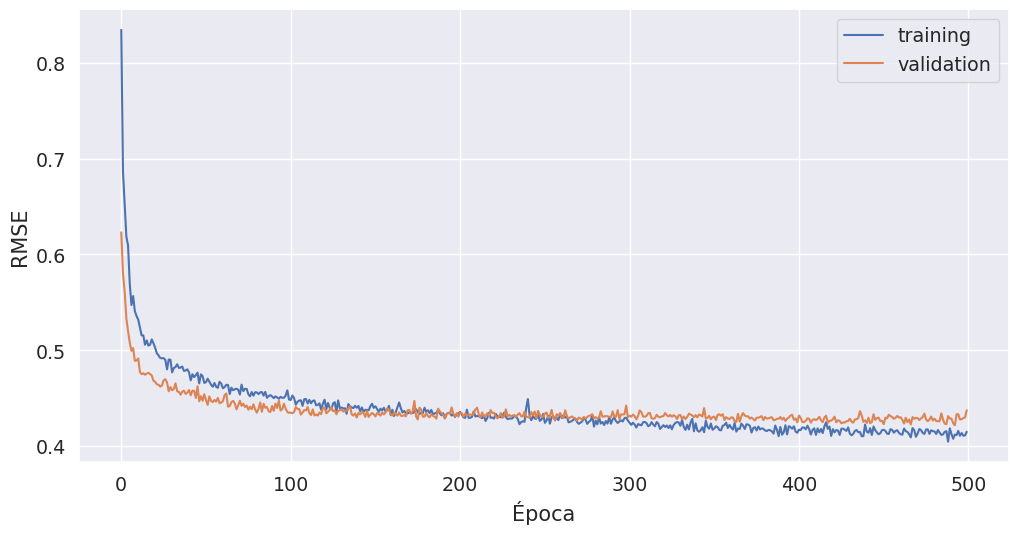

In [62]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss, label="training")
plt.plot(val_loss, label="validation")
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

Ahora probamos, por otro lado, el método de [regularización](https://keras.io/api/layers/regularizers/) tipo L2

In [63]:
from keras.regularizers import l2

In [64]:
model = Sequential()
model.add(Dense(100,activation='relu',input_shape=(8,), kernel_regularizer=l2(0.01)))
model.add(Dense(50,activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1,activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse',optimizer=opt)

In [65]:
history = model.fit(X_train.values ,y_train.values,epochs=500,validation_data=(X_validation.values, y_validation.values))

Train on 6000 samples, validate on 4000 samples
Epoch 1/500
6000/6000 [==============================] - 0s - loss: 0.9954 - val_loss: 0.7598
Epoch 2/500
6000/6000 [==============================] - 0s - loss: 0.7164 - val_loss: 0.6028
Epoch 3/500
6000/6000 [==============================] - 0s - loss: 0.5707 - val_loss: 0.5203
Epoch 4/500
6000/6000 [==============================] - 0s - loss: 0.5114 - val_loss: 0.4871
Epoch 5/500
6000/6000 [==============================] - 0s - loss: 0.4897 - val_loss: 0.4373
Epoch 6/500
6000/6000 [==============================] - 0s - loss: 0.4528 - val_loss: 0.4214
Epoch 7/500
6000/6000 [==============================] - 0s - loss: 0.4240 - val_loss: 0.3985
Epoch 8/500
6000/6000 [==============================] - 0s - loss: 0.4842 - val_loss: 0.3970
Epoch 9/500
6000/6000 [==============================] - 0s - loss: 0.3901 - val_loss: 0.3976
Epoch 10/500
6000/6000 [==============================] - 0s - loss: 0.3794 - val_loss: 0.3679
Epoch 11/50

6000/6000 [==============================] - 0s - loss: 0.2592 - val_loss: 0.2564
Epoch 87/500
6000/6000 [==============================] - 0s - loss: 0.2586 - val_loss: 0.2549
Epoch 88/500
6000/6000 [==============================] - 0s - loss: 0.2571 - val_loss: 0.2543
Epoch 89/500
6000/6000 [==============================] - 0s - loss: 0.2623 - val_loss: 0.2908
Epoch 90/500
6000/6000 [==============================] - 0s - loss: 0.2578 - val_loss: 0.2658
Epoch 91/500
6000/6000 [==============================] - 0s - loss: 0.2581 - val_loss: 0.2546
Epoch 92/500
6000/6000 [==============================] - 0s - loss: 0.2555 - val_loss: 0.2504
Epoch 93/500
6000/6000 [==============================] - 0s - loss: 0.2562 - val_loss: 0.2525
Epoch 94/500
6000/6000 [==============================] - 0s - loss: 0.2574 - val_loss: 0.2640
Epoch 95/500
6000/6000 [==============================] - 0s - loss: 0.2556 - val_loss: 0.2567
Epoch 96/500
6000/6000 [==============================] - 0s - 

6000/6000 [==============================] - 0s - loss: 0.2396 - val_loss: 0.2436
Epoch 172/500
6000/6000 [==============================] - 0s - loss: 0.2350 - val_loss: 0.2381
Epoch 173/500
6000/6000 [==============================] - 0s - loss: 0.2371 - val_loss: 0.2599
Epoch 174/500
6000/6000 [==============================] - 0s - loss: 0.2395 - val_loss: 0.2363
Epoch 175/500
6000/6000 [==============================] - 0s - loss: 0.2390 - val_loss: 0.2342
Epoch 176/500
6000/6000 [==============================] - 0s - loss: 0.2374 - val_loss: 0.2329
Epoch 177/500
6000/6000 [==============================] - 0s - loss: 0.2371 - val_loss: 0.2393
Epoch 178/500
6000/6000 [==============================] - 0s - loss: 0.2364 - val_loss: 0.2347
Epoch 179/500
6000/6000 [==============================] - 0s - loss: 0.2360 - val_loss: 0.2433
Epoch 180/500
6000/6000 [==============================] - 0s - loss: 0.2350 - val_loss: 0.2407
Epoch 181/500
6000/6000 [=============================

6000/6000 [==============================] - 0s - loss: 0.2297 - val_loss: 0.2511
Epoch 257/500
6000/6000 [==============================] - 0s - loss: 0.2306 - val_loss: 0.2606
Epoch 258/500
6000/6000 [==============================] - 0s - loss: 0.2274 - val_loss: 0.2470
Epoch 259/500
6000/6000 [==============================] - 0s - loss: 0.2299 - val_loss: 0.2306
Epoch 260/500
6000/6000 [==============================] - 0s - loss: 0.2306 - val_loss: 0.2407
Epoch 261/500
6000/6000 [==============================] - 0s - loss: 0.2291 - val_loss: 0.2329
Epoch 262/500
6000/6000 [==============================] - 0s - loss: 0.2271 - val_loss: 0.2335
Epoch 263/500
6000/6000 [==============================] - 0s - loss: 0.2311 - val_loss: 0.2362
Epoch 264/500
6000/6000 [==============================] - 0s - loss: 0.2280 - val_loss: 0.2365
Epoch 265/500
6000/6000 [==============================] - 0s - loss: 0.2434 - val_loss: 0.2405
Epoch 266/500
6000/6000 [=============================

6000/6000 [==============================] - 0s - loss: 0.2247 - val_loss: 0.2315
Epoch 342/500
6000/6000 [==============================] - 0s - loss: 0.2279 - val_loss: 0.2258
Epoch 343/500
6000/6000 [==============================] - 0s - loss: 0.2258 - val_loss: 0.2289
Epoch 344/500
6000/6000 [==============================] - 0s - loss: 0.2244 - val_loss: 0.2247
Epoch 345/500
6000/6000 [==============================] - 0s - loss: 0.2227 - val_loss: 0.2550
Epoch 346/500
6000/6000 [==============================] - 0s - loss: 0.2282 - val_loss: 0.2425
Epoch 347/500
6000/6000 [==============================] - 0s - loss: 0.2226 - val_loss: 0.2397
Epoch 348/500
6000/6000 [==============================] - 0s - loss: 0.2292 - val_loss: 0.2278
Epoch 349/500
6000/6000 [==============================] - 0s - loss: 0.2275 - val_loss: 0.2367
Epoch 350/500
6000/6000 [==============================] - 0s - loss: 0.2252 - val_loss: 0.2280
Epoch 351/500
6000/6000 [=============================

6000/6000 [==============================] - 0s - loss: 0.2231 - val_loss: 0.2328
Epoch 427/500
6000/6000 [==============================] - 0s - loss: 0.2255 - val_loss: 0.2427
Epoch 428/500
6000/6000 [==============================] - 0s - loss: 0.2273 - val_loss: 0.2212
Epoch 429/500
6000/6000 [==============================] - 0s - loss: 0.2237 - val_loss: 0.2288
Epoch 430/500
6000/6000 [==============================] - 0s - loss: 0.2216 - val_loss: 0.2274
Epoch 431/500
6000/6000 [==============================] - 0s - loss: 0.2203 - val_loss: 0.2274
Epoch 432/500
6000/6000 [==============================] - 0s - loss: 0.2208 - val_loss: 0.2215
Epoch 433/500
6000/6000 [==============================] - 0s - loss: 0.2209 - val_loss: 0.2279
Epoch 434/500
6000/6000 [==============================] - 0s - loss: 0.2197 - val_loss: 0.2363
Epoch 435/500
6000/6000 [==============================] - 0s - loss: 0.2214 - val_loss: 0.2529
Epoch 436/500
6000/6000 [=============================

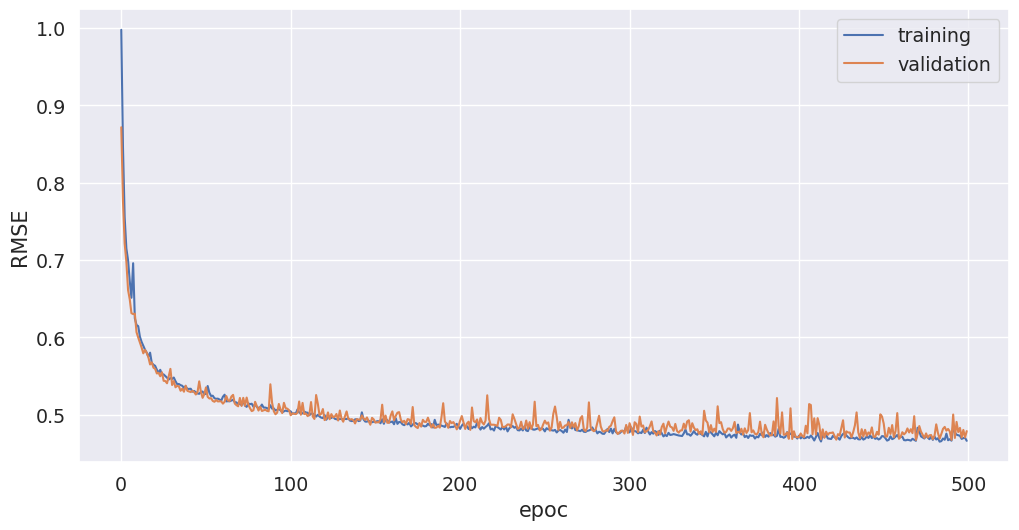

In [66]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("RMSE")
plt.xlabel("epoc")
plt.plot(loss, label="training")
plt.plot(val_loss, label="validation")
plt.legend()


Vemos que el poder de generalización de esta red es mucho mejor que la anterior (los errores de validation y training no están tan separados y no perdí precisión o accuracy)

## Clasificación

Primero un ejemplo de clasificación binaria y después uno de clasificación con n clases

In [67]:
header = ["pelvic incidence", "pelvic tilt", "lumbar lordosis angle", "sacral slope", "pelvic radius", "grade of spondylolisthesis", "class"]

In [68]:
header

['pelvic incidence',
 'pelvic tilt',
 'lumbar lordosis angle',
 'sacral slope',
 'pelvic radius',
 'grade of spondylolisthesis',
 'class']

In [69]:
data = pd.read_csv("https://drive.google.com/uc?export=download&id=1T9VNcGMatXFrg7JpIkwHpqHrb8dGKvtP", names=header, index_col=False)
data.head()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB


/home/cuchuflito/anaconda3/envs/env3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f64629fea90>,
      dtype=object)

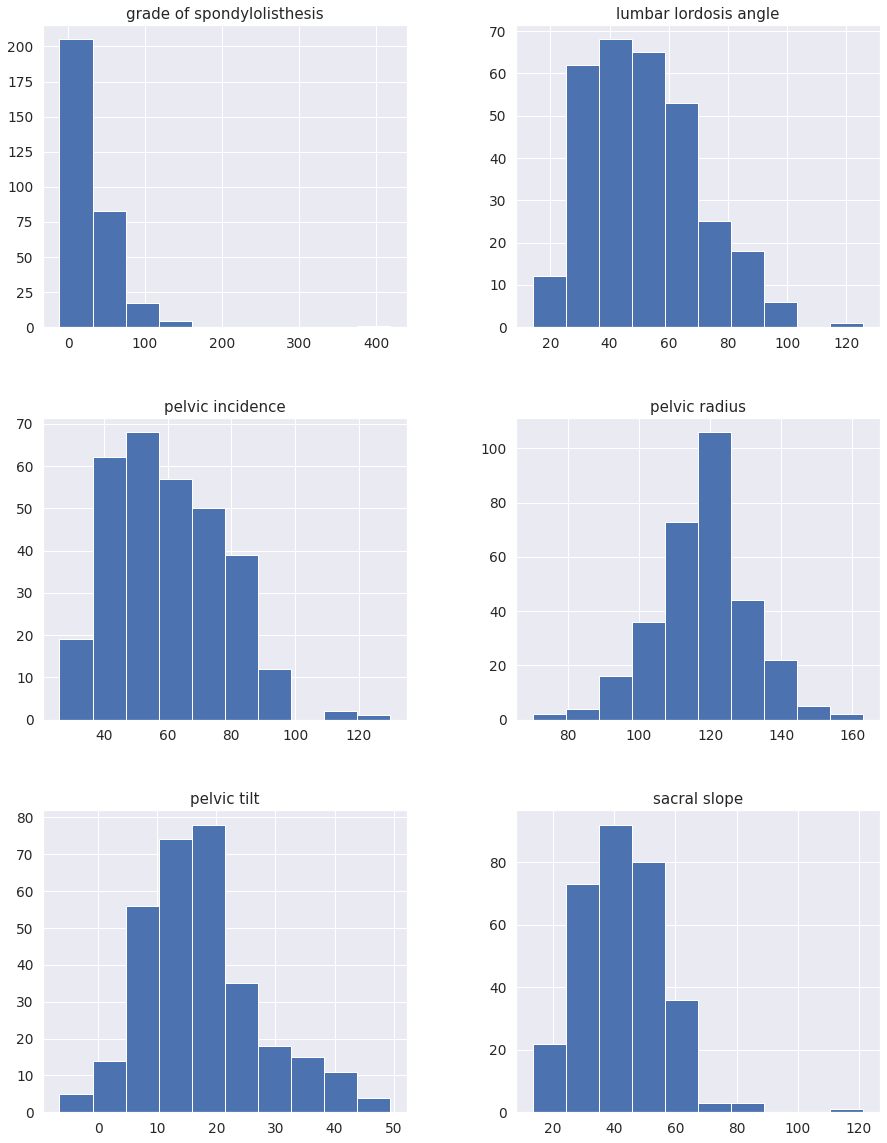

In [70]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()

data.hist(ax=ax)

Los datasets no están tan mal distribuídos así que elijo no normalizarlos

Paso los valores de "AB" y "NO" a valores categóricos

In [71]:
label_encoder = preprocessing.LabelEncoder()

In [72]:
target = np.unique(data["class"])

In [73]:
label_encoder.fit(target)

LabelEncoder()

In [74]:
data["class"] = label_encoder.transform(data["class"])

In [75]:
data.head()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,0
1,39.06,10.06,25.02,29.00,114.41,4.56,0
2,68.83,22.22,50.09,46.61,105.99,-3.53,0
3,69.30,24.65,44.31,44.64,101.87,11.21,0
4,49.71,9.65,28.32,40.06,108.17,7.92,0


In [76]:
x_columns = ["pelvic incidence", "pelvic tilt", "lumbar lordosis angle", "sacral slope", "pelvic radius", "grade of spondylolisthesis"]
x_data = data[x_columns]
y_data = data['class']

In [77]:
x_data.head()

,pelvic incidence,pelvic tilt,lumbar lordosis angle,sacral slope,pelvic radius,grade of spondylolisthesis
0,63.03,22.55,39.61,40.48,98.67,-0.25
1,39.06,10.06,25.02,29.00,114.41,4.56
2,68.83,22.22,50.09,46.61,105.99,-3.53
3,69.30,24.65,44.31,44.64,101.87,11.21
4,49.71,9.65,28.32,40.06,108.17,7.92


Separo los datos en train y validation

In [78]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(
    x_data, y_data, test_size=0.4, random_state=66
)

Entreno un modelo sencillo de clasificación, un árbol de decisión para tener una referencia de error.

In [79]:
from sklearn.tree import DecisionTreeClassifier

In [80]:
model_tree = DecisionTreeClassifier(criterion="entropy")

In [81]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

Calculo el accuracy de mi árbol entrenado:

In [82]:
from sklearn.metrics import accuracy_score

In [83]:
pred = model_tree.predict(X_validation)

In [84]:
decision_tree_acc = accuracy_score(pred, y_validation)
decision_tree_acc

0.7983870967741935

Mi red tiene que tener como cantidad de neuronas en la capa de salida la cantidad de clases si uso softmax o 1 neurona para el caso que use una activación de tipo sigmoide

In [85]:
num_classes = 2

In [86]:
model = Sequential()
model.add(Dense(8, input_shape=(6,), activation='tanh'))
model.add(Dense(num_classes, activation="softmax"))

In [87]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 8)                 56        
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 18        
Total params: 74
Trainable params: 74
Non-trainable params: 0
_________________________________________________________________


El modelo necesita los labels en one hot encoding, uso la función to_categorical para transformarlos

In [88]:
y_train[1:10]

235    1
66     0
143    0
256    1
18     0
279    1
273    1
120    0
154    0
Name: class, dtype: int64

In [89]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_validation, num_classes)

In [90]:
y_train[1:10]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]])

Ahora si puedo entrenar!

In [91]:
history = model.fit(X_train.values,y_train,epochs=100, validation_data=(X_validation.values, y_test))

Train on 186 samples, validate on 124 samples
Epoch 1/100
186/186 [==============================] - 0s - loss: 1.4252 - acc: 0.5376 - val_loss: 1.4731 - val_acc: 0.5403
Epoch 2/100
186/186 [==============================] - 0s - loss: 1.3525 - acc: 0.5645 - val_loss: 1.4203 - val_acc: 0.5726
Epoch 3/100
186/186 [==============================] - 0s - loss: 1.2976 - acc: 0.5914 - val_loss: 1.3779 - val_acc: 0.5806
Epoch 4/100
186/186 [==============================] - 0s - loss: 1.2596 - acc: 0.6075 - val_loss: 1.3358 - val_acc: 0.5806
Epoch 5/100
186/186 [==============================] - 0s - loss: 1.2259 - acc: 0.5538 - val_loss: 1.2998 - val_acc: 0.4919
Epoch 6/100
186/186 [==============================] - 0s - loss: 1.1931 - acc: 0.5161 - val_loss: 1.2569 - val_acc: 0.4919
Epoch 7/100
186/186 [==============================] - 0s - loss: 1.1545 - acc: 0.5269 - val_loss: 1.2084 - val_acc: 0.5161
Epoch 8/100
186/186 [==============================] - 0s - loss: 1.1134 - acc: 0.5376

186/186 [==============================] - 0s - loss: 0.4664 - acc: 0.6989 - val_loss: 0.4836 - val_acc: 0.6371
Epoch 67/100
186/186 [==============================] - 0s - loss: 0.4654 - acc: 0.6989 - val_loss: 0.4829 - val_acc: 0.6371
Epoch 68/100
186/186 [==============================] - 0s - loss: 0.4644 - acc: 0.7634 - val_loss: 0.4823 - val_acc: 0.7823
Epoch 69/100
186/186 [==============================] - 0s - loss: 0.4636 - acc: 0.7634 - val_loss: 0.4812 - val_acc: 0.7500
Epoch 70/100
186/186 [==============================] - 0s - loss: 0.4635 - acc: 0.7581 - val_loss: 0.4803 - val_acc: 0.7500
Epoch 71/100
186/186 [==============================] - 0s - loss: 0.4631 - acc: 0.7581 - val_loss: 0.4800 - val_acc: 0.7419
Epoch 72/100
186/186 [==============================] - 0s - loss: 0.4612 - acc: 0.7581 - val_loss: 0.4792 - val_acc: 0.7419
Epoch 73/100
186/186 [==============================] - 0s - loss: 0.4601 - acc: 0.7634 - val_loss: 0.4785 - val_acc: 0.7419
Epoch 74/100


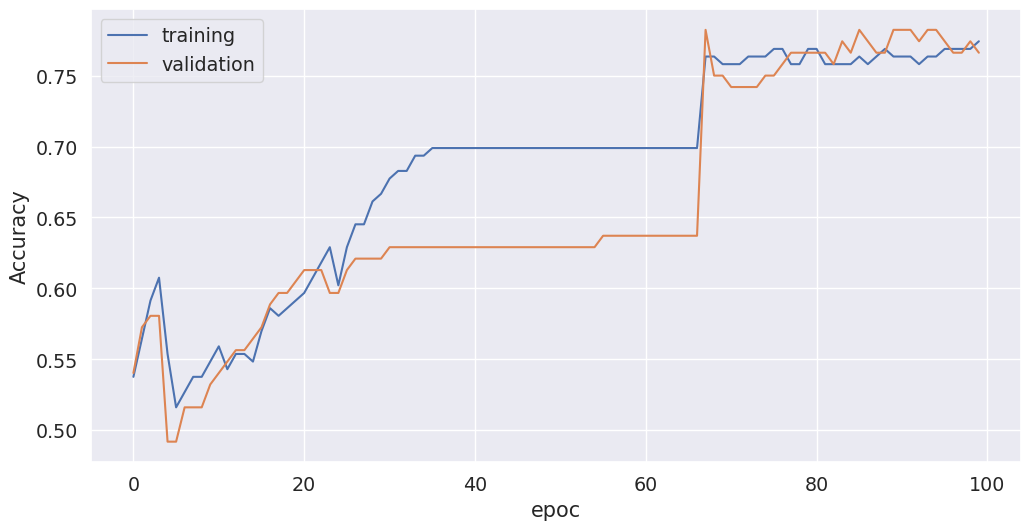

In [92]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["acc"], label="training")
plt.plot(history.history["val_acc"], label="validation")
plt.legend()

A medida que las red se va haciendo más profunda conviene usar relu. Agrego relu + regularizacion y cambio optimizador

In [93]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='relu'))
model.add(Dense(num_classes, activation="softmax"))

In [94]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 16)                112       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_4 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_30 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_31 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_________________________________________________________________


In [95]:
history = model.fit(X_train.values,y_train,epochs=100, validation_data=(X_validation.values, y_test))

Train on 186 samples, validate on 124 samples
Epoch 1/100
186/186 [==============================] - 0s - loss: 2.6727 - acc: 0.7366 - val_loss: 5.1760 - val_acc: 0.6371
Epoch 2/100
186/186 [==============================] - 0s - loss: 3.0373 - acc: 0.6505 - val_loss: 4.7334 - val_acc: 0.6371
Epoch 3/100
186/186 [==============================] - 0s - loss: 3.0095 - acc: 0.7097 - val_loss: 4.3232 - val_acc: 0.6371
Epoch 4/100
186/186 [==============================] - 0s - loss: 2.7722 - acc: 0.6720 - val_loss: 3.5063 - val_acc: 0.6371
Epoch 5/100
186/186 [==============================] - 0s - loss: 3.1867 - acc: 0.6452 - val_loss: 2.8917 - val_acc: 0.6290
Epoch 6/100
186/186 [==============================] - 0s - loss: 2.9966 - acc: 0.6344 - val_loss: 2.5924 - val_acc: 0.6290
Epoch 7/100
186/186 [==============================] - 0s - loss: 2.4542 - acc: 0.7043 - val_loss: 1.6161 - val_acc: 0.5887
Epoch 8/100
186/186 [==============================] - 0s - loss: 2.1911 - acc: 0.6720

186/186 [==============================] - 0s - loss: 0.7433 - acc: 0.7043 - val_loss: 0.6655 - val_acc: 0.6371
Epoch 66/100
186/186 [==============================] - 0s - loss: 0.6462 - acc: 0.7151 - val_loss: 0.6663 - val_acc: 0.6371
Epoch 67/100
186/186 [==============================] - 0s - loss: 1.0465 - acc: 0.6774 - val_loss: 0.6725 - val_acc: 0.6371
Epoch 68/100
186/186 [==============================] - 0s - loss: 0.7935 - acc: 0.7312 - val_loss: 0.6684 - val_acc: 0.6371
Epoch 69/100
186/186 [==============================] - 0s - loss: 0.7208 - acc: 0.6989 - val_loss: 0.6640 - val_acc: 0.6371
Epoch 70/100
186/186 [==============================] - 0s - loss: 0.9469 - acc: 0.6935 - val_loss: 0.6660 - val_acc: 0.6371
Epoch 71/100
186/186 [==============================] - 0s - loss: 0.8278 - acc: 0.6720 - val_loss: 0.6634 - val_acc: 0.6371
Epoch 72/100
186/186 [==============================] - 0s - loss: 0.7311 - acc: 0.7151 - val_loss: 0.6641 - val_acc: 0.6371
Epoch 73/100


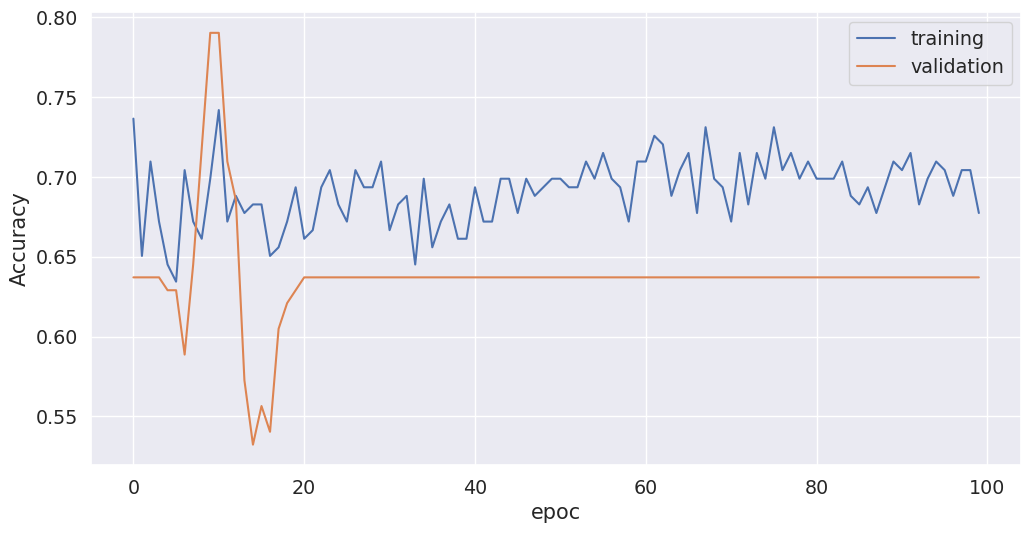

In [96]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["acc"], label="training")
plt.plot(history.history["val_acc"], label="validation")
plt.legend()

Cambio de nuevo el optimizador por RMSprop

In [97]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='relu'))
model.add(Dense(num_classes, activation="softmax"))

In [98]:
opt = keras.optimizers.RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 16)                112       
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_6 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_34 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_35 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_________________________________________________________________


In [99]:
history = model.fit(X_train.values,y_train,epochs=100, validation_data=(X_validation.values, y_test))

Train on 186 samples, validate on 124 samples
Epoch 1/100
186/186 [==============================] - 0s - loss: 10.7380 - acc: 0.3226 - val_loss: 10.2688 - val_acc: 0.3629
Epoch 2/100
186/186 [==============================] - 0s - loss: 10.9485 - acc: 0.2957 - val_loss: 10.2688 - val_acc: 0.3629
Epoch 3/100
186/186 [==============================] - 0s - loss: 10.9649 - acc: 0.3118 - val_loss: 10.2688 - val_acc: 0.3629
Epoch 4/100
186/186 [==============================] - 0s - loss: 11.1959 - acc: 0.2957 - val_loss: 10.2688 - val_acc: 0.3629
Epoch 5/100
186/186 [==============================] - 0s - loss: 10.8335 - acc: 0.3118 - val_loss: 10.2688 - val_acc: 0.3629
Epoch 6/100
186/186 [==============================] - 0s - loss: 11.1952 - acc: 0.3011 - val_loss: 10.2688 - val_acc: 0.3629
Epoch 7/100
186/186 [==============================] - 0s - loss: 11.2875 - acc: 0.2957 - val_loss: 10.2688 - val_acc: 0.3629
Epoch 8/100
186/186 [==============================] - 0s - loss: 11.065

186/186 [==============================] - 0s - loss: 0.6661 - acc: 0.6828 - val_loss: 0.6529 - val_acc: 0.6290
Epoch 66/100
186/186 [==============================] - 0s - loss: 0.6464 - acc: 0.6667 - val_loss: 0.6487 - val_acc: 0.6290
Epoch 67/100
186/186 [==============================] - 0s - loss: 0.6546 - acc: 0.7043 - val_loss: 0.6407 - val_acc: 0.6290
Epoch 68/100
186/186 [==============================] - 0s - loss: 0.6855 - acc: 0.7151 - val_loss: 0.6368 - val_acc: 0.6290
Epoch 69/100
186/186 [==============================] - 0s - loss: 0.6720 - acc: 0.7043 - val_loss: 0.6314 - val_acc: 0.6371
Epoch 70/100
186/186 [==============================] - 0s - loss: 0.6896 - acc: 0.6989 - val_loss: 0.6326 - val_acc: 0.6371
Epoch 71/100
186/186 [==============================] - 0s - loss: 0.7272 - acc: 0.6882 - val_loss: 0.6308 - val_acc: 0.6371
Epoch 72/100
186/186 [==============================] - 0s - loss: 0.6130 - acc: 0.7204 - val_loss: 0.6277 - val_acc: 0.6371
Epoch 73/100


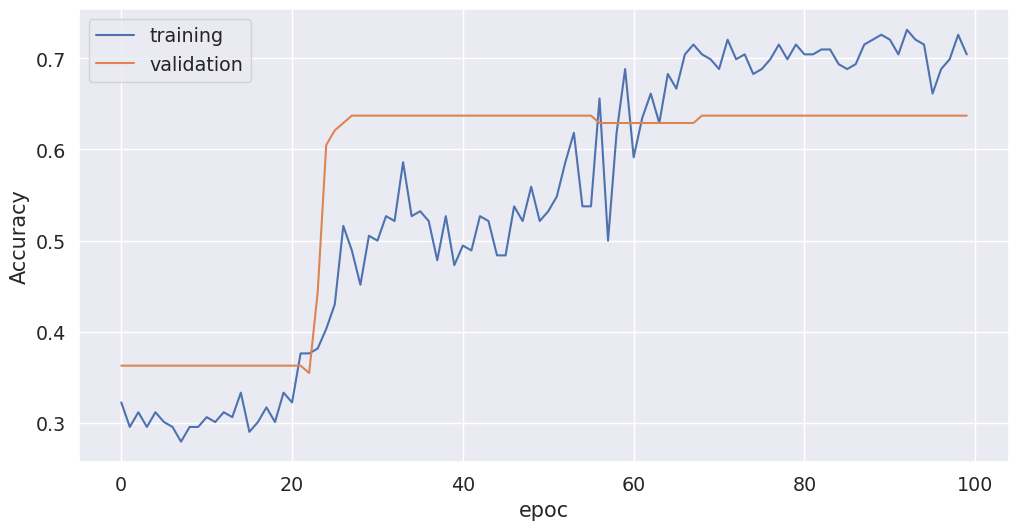

In [100]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["acc"], label="training")
plt.plot(history.history["val_acc"], label="validation")
plt.legend()

Agreguemosle regularización de tipo L2

In [101]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.25))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.25))
model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(num_classes, activation="softmax"))

In [102]:
opt = keras.optimizers.RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 16)                112       
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_8 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_38 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_39 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_________________________________________________________________


In [103]:
history = model.fit(X_train.values,y_train,epochs=100, validation_data=(X_validation.values, y_test))

Train on 186 samples, validate on 124 samples
Epoch 1/100
186/186 [==============================] - 0s - loss: 7.6027 - acc: 0.3495 - val_loss: 4.3325 - val_acc: 0.3629
Epoch 2/100
186/186 [==============================] - 0s - loss: 6.0205 - acc: 0.4355 - val_loss: 1.5236 - val_acc: 0.4597
Epoch 3/100
186/186 [==============================] - 0s - loss: 5.3407 - acc: 0.4409 - val_loss: 0.9427 - val_acc: 0.6613
Epoch 4/100
186/186 [==============================] - 0s - loss: 4.4175 - acc: 0.5484 - val_loss: 0.8939 - val_acc: 0.7016
Epoch 5/100
186/186 [==============================] - 0s - loss: 4.1854 - acc: 0.4677 - val_loss: 0.9137 - val_acc: 0.6532
Epoch 6/100
186/186 [==============================] - 0s - loss: 3.6854 - acc: 0.4839 - val_loss: 0.9118 - val_acc: 0.6371
Epoch 7/100
186/186 [==============================] - 0s - loss: 3.3990 - acc: 0.5484 - val_loss: 0.9078 - val_acc: 0.6371
Epoch 8/100
186/186 [==============================] - 0s - loss: 2.4719 - acc: 0.5860

186/186 [==============================] - 0s - loss: 0.7071 - acc: 0.6989 - val_loss: 0.7474 - val_acc: 0.6371
Epoch 67/100
186/186 [==============================] - 0s - loss: 0.6969 - acc: 0.7043 - val_loss: 0.7462 - val_acc: 0.6371
Epoch 68/100
186/186 [==============================] - 0s - loss: 0.6966 - acc: 0.6935 - val_loss: 0.7450 - val_acc: 0.6371
Epoch 69/100
186/186 [==============================] - 0s - loss: 0.7124 - acc: 0.6989 - val_loss: 0.7437 - val_acc: 0.6371
Epoch 70/100
186/186 [==============================] - 0s - loss: 0.7118 - acc: 0.6935 - val_loss: 0.7425 - val_acc: 0.6371
Epoch 71/100
186/186 [==============================] - 0s - loss: 0.6929 - acc: 0.7043 - val_loss: 0.7413 - val_acc: 0.6371
Epoch 72/100
186/186 [==============================] - 0s - loss: 0.7154 - acc: 0.7043 - val_loss: 0.7401 - val_acc: 0.6371
Epoch 73/100
186/186 [==============================] - 0s - loss: 0.7009 - acc: 0.7043 - val_loss: 0.7388 - val_acc: 0.6371
Epoch 74/100


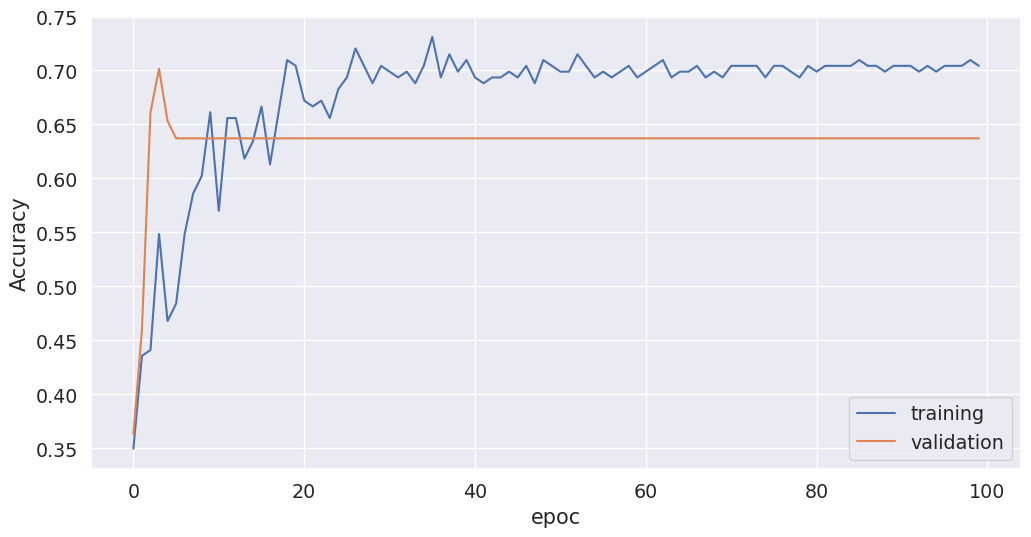

In [104]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["acc"], label="training")
plt.plot(history.history["val_acc"], label="validation")
plt.legend()

Parece estar muy errático el aprendizaje, bajemos el parámetro de regularización y bajemos la tasa de aprendizaje

In [105]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(num_classes, activation="softmax"))

In [106]:
opt = keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 16)                112       
_________________________________________________________________
dense_41 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_42 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_43 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_________________________________________________________________


In [107]:
history = model.fit(X_train.values,y_train,epochs=1000, validation_data=(X_validation.values, y_test))

Train on 186 samples, validate on 124 samples
Epoch 1/1000
186/186 [==============================] - 0s - loss: 4.7615 - acc: 0.7043 - val_loss: 5.8743 - val_acc: 0.6371
Epoch 2/1000
186/186 [==============================] - 0s - loss: 4.7568 - acc: 0.7043 - val_loss: 5.8743 - val_acc: 0.6371
Epoch 3/1000
186/186 [==============================] - 0s - loss: 4.7533 - acc: 0.7043 - val_loss: 5.8743 - val_acc: 0.6371
Epoch 4/1000
186/186 [==============================] - 0s - loss: 4.7500 - acc: 0.7043 - val_loss: 5.8744 - val_acc: 0.6371
Epoch 5/1000
186/186 [==============================] - 0s - loss: 4.7429 - acc: 0.7043 - val_loss: 5.8746 - val_acc: 0.6371
Epoch 6/1000
186/186 [==============================] - 0s - loss: 4.7232 - acc: 0.7043 - val_loss: 5.8616 - val_acc: 0.6371
Epoch 7/1000
186/186 [==============================] - 0s - loss: 4.6915 - acc: 0.7043 - val_loss: 5.8276 - val_acc: 0.6371
Epoch 8/1000
186/186 [==============================] - 0s - loss: 4.6338 - acc

186/186 [==============================] - 0s - loss: 0.6979 - acc: 0.7043 - val_loss: 0.7767 - val_acc: 0.6371
Epoch 66/1000
186/186 [==============================] - 0s - loss: 0.6931 - acc: 0.7043 - val_loss: 0.7712 - val_acc: 0.6371
Epoch 67/1000
186/186 [==============================] - 0s - loss: 0.6885 - acc: 0.7043 - val_loss: 0.7625 - val_acc: 0.6371
Epoch 68/1000
186/186 [==============================] - 0s - loss: 0.6839 - acc: 0.7043 - val_loss: 0.7548 - val_acc: 0.6371
Epoch 69/1000
186/186 [==============================] - 0s - loss: 0.6798 - acc: 0.7043 - val_loss: 0.7498 - val_acc: 0.6371
Epoch 70/1000
186/186 [==============================] - 0s - loss: 0.6760 - acc: 0.7043 - val_loss: 0.7433 - val_acc: 0.6371
Epoch 71/1000
186/186 [==============================] - 0s - loss: 0.6723 - acc: 0.7043 - val_loss: 0.7392 - val_acc: 0.6371
Epoch 72/1000
186/186 [==============================] - 0s - loss: 0.6690 - acc: 0.7043 - val_loss: 0.7331 - val_acc: 0.6371
Epoch 

186/186 [==============================] - 0s - loss: 0.6042 - acc: 0.7043 - val_loss: 0.6727 - val_acc: 0.6371
Epoch 130/1000
186/186 [==============================] - 0s - loss: 0.6034 - acc: 0.7043 - val_loss: 0.6683 - val_acc: 0.6371
Epoch 131/1000
186/186 [==============================] - 0s - loss: 0.6028 - acc: 0.7043 - val_loss: 0.6664 - val_acc: 0.6371
Epoch 132/1000
186/186 [==============================] - 0s - loss: 0.6022 - acc: 0.7043 - val_loss: 0.6687 - val_acc: 0.6371
Epoch 133/1000
186/186 [==============================] - 0s - loss: 0.6012 - acc: 0.7043 - val_loss: 0.6720 - val_acc: 0.6371
Epoch 134/1000
186/186 [==============================] - 0s - loss: 0.6007 - acc: 0.7043 - val_loss: 0.6702 - val_acc: 0.6371
Epoch 135/1000
186/186 [==============================] - 0s - loss: 0.6001 - acc: 0.7043 - val_loss: 0.6685 - val_acc: 0.6371
Epoch 136/1000
186/186 [==============================] - 0s - loss: 0.5991 - acc: 0.7043 - val_loss: 0.6662 - val_acc: 0.6371

186/186 [==============================] - 0s - loss: 0.5573 - acc: 0.7043 - val_loss: 0.6373 - val_acc: 0.6371
Epoch 194/1000
186/186 [==============================] - 0s - loss: 0.5564 - acc: 0.7043 - val_loss: 0.6407 - val_acc: 0.6371
Epoch 195/1000
186/186 [==============================] - 0s - loss: 0.5559 - acc: 0.7043 - val_loss: 0.6364 - val_acc: 0.6371
Epoch 196/1000
186/186 [==============================] - 0s - loss: 0.5553 - acc: 0.7043 - val_loss: 0.6355 - val_acc: 0.6371
Epoch 197/1000
186/186 [==============================] - 0s - loss: 0.5542 - acc: 0.7043 - val_loss: 0.6345 - val_acc: 0.6371
Epoch 198/1000
186/186 [==============================] - 0s - loss: 0.5535 - acc: 0.7043 - val_loss: 0.6313 - val_acc: 0.6371
Epoch 199/1000
186/186 [==============================] - 0s - loss: 0.5529 - acc: 0.7043 - val_loss: 0.6332 - val_acc: 0.6371
Epoch 200/1000
186/186 [==============================] - 0s - loss: 0.5516 - acc: 0.7043 - val_loss: 0.6325 - val_acc: 0.6371

186/186 [==============================] - 0s - loss: 0.4875 - acc: 0.7043 - val_loss: 0.5790 - val_acc: 0.6371
Epoch 258/1000
186/186 [==============================] - 0s - loss: 0.4861 - acc: 0.7043 - val_loss: 0.5805 - val_acc: 0.6371
Epoch 259/1000
186/186 [==============================] - 0s - loss: 0.4845 - acc: 0.7043 - val_loss: 0.5773 - val_acc: 0.6371
Epoch 260/1000
186/186 [==============================] - 0s - loss: 0.4830 - acc: 0.7043 - val_loss: 0.5793 - val_acc: 0.6371
Epoch 261/1000
186/186 [==============================] - 0s - loss: 0.4816 - acc: 0.7043 - val_loss: 0.5727 - val_acc: 0.6371
Epoch 262/1000
186/186 [==============================] - 0s - loss: 0.4803 - acc: 0.7043 - val_loss: 0.5742 - val_acc: 0.6371
Epoch 263/1000
186/186 [==============================] - 0s - loss: 0.4787 - acc: 0.7043 - val_loss: 0.5749 - val_acc: 0.6371
Epoch 264/1000
186/186 [==============================] - 0s - loss: 0.4774 - acc: 0.7043 - val_loss: 0.5702 - val_acc: 0.6371

186/186 [==============================] - 0s - loss: 0.3968 - acc: 0.8118 - val_loss: 0.4982 - val_acc: 0.7419
Epoch 322/1000
186/186 [==============================] - 0s - loss: 0.3959 - acc: 0.8118 - val_loss: 0.4979 - val_acc: 0.7419
Epoch 323/1000
186/186 [==============================] - 0s - loss: 0.3955 - acc: 0.8172 - val_loss: 0.4985 - val_acc: 0.7419
Epoch 324/1000
186/186 [==============================] - 0s - loss: 0.3944 - acc: 0.8118 - val_loss: 0.4942 - val_acc: 0.7419
Epoch 325/1000
186/186 [==============================] - 0s - loss: 0.3941 - acc: 0.8172 - val_loss: 0.4941 - val_acc: 0.7419
Epoch 326/1000
186/186 [==============================] - 0s - loss: 0.3931 - acc: 0.8226 - val_loss: 0.4964 - val_acc: 0.7339
Epoch 327/1000
186/186 [==============================] - 0s - loss: 0.3925 - acc: 0.8226 - val_loss: 0.4957 - val_acc: 0.7258
Epoch 328/1000
186/186 [==============================] - 0s - loss: 0.3923 - acc: 0.8226 - val_loss: 0.4949 - val_acc: 0.7258

186/186 [==============================] - 0s - loss: 0.3718 - acc: 0.8495 - val_loss: 0.4870 - val_acc: 0.7339
Epoch 386/1000
186/186 [==============================] - 0s - loss: 0.3711 - acc: 0.8441 - val_loss: 0.4909 - val_acc: 0.7419
Epoch 387/1000
186/186 [==============================] - 0s - loss: 0.3721 - acc: 0.8441 - val_loss: 0.4849 - val_acc: 0.7419
Epoch 388/1000
186/186 [==============================] - 0s - loss: 0.3709 - acc: 0.8495 - val_loss: 0.4855 - val_acc: 0.7419
Epoch 389/1000
186/186 [==============================] - 0s - loss: 0.3709 - acc: 0.8441 - val_loss: 0.4894 - val_acc: 0.7339
Epoch 390/1000
186/186 [==============================] - 0s - loss: 0.3712 - acc: 0.8441 - val_loss: 0.4867 - val_acc: 0.7339
Epoch 391/1000
186/186 [==============================] - 0s - loss: 0.3703 - acc: 0.8441 - val_loss: 0.4878 - val_acc: 0.7339
Epoch 392/1000
186/186 [==============================] - 0s - loss: 0.3705 - acc: 0.8441 - val_loss: 0.4866 - val_acc: 0.7339

186/186 [==============================] - 0s - loss: 0.3607 - acc: 0.8495 - val_loss: 0.4864 - val_acc: 0.7177
Epoch 450/1000
186/186 [==============================] - 0s - loss: 0.3610 - acc: 0.8495 - val_loss: 0.4871 - val_acc: 0.7177
Epoch 451/1000
186/186 [==============================] - 0s - loss: 0.3601 - acc: 0.8495 - val_loss: 0.4883 - val_acc: 0.7177
Epoch 452/1000
186/186 [==============================] - 0s - loss: 0.3602 - acc: 0.8495 - val_loss: 0.4837 - val_acc: 0.7339
Epoch 453/1000
186/186 [==============================] - 0s - loss: 0.3604 - acc: 0.8441 - val_loss: 0.4839 - val_acc: 0.7258
Epoch 454/1000
186/186 [==============================] - 0s - loss: 0.3601 - acc: 0.8495 - val_loss: 0.4821 - val_acc: 0.7339
Epoch 455/1000
186/186 [==============================] - 0s - loss: 0.3597 - acc: 0.8495 - val_loss: 0.4852 - val_acc: 0.7258
Epoch 456/1000
186/186 [==============================] - 0s - loss: 0.3596 - acc: 0.8441 - val_loss: 0.4825 - val_acc: 0.7339

186/186 [==============================] - 0s - loss: 0.3523 - acc: 0.8548 - val_loss: 0.4745 - val_acc: 0.7500
Epoch 514/1000
186/186 [==============================] - 0s - loss: 0.3524 - acc: 0.8495 - val_loss: 0.4756 - val_acc: 0.7258
Epoch 515/1000
186/186 [==============================] - 0s - loss: 0.3526 - acc: 0.8495 - val_loss: 0.4772 - val_acc: 0.7258
Epoch 516/1000
186/186 [==============================] - 0s - loss: 0.3519 - acc: 0.8495 - val_loss: 0.4773 - val_acc: 0.7419
Epoch 517/1000
186/186 [==============================] - 0s - loss: 0.3517 - acc: 0.8495 - val_loss: 0.4739 - val_acc: 0.7500
Epoch 518/1000
186/186 [==============================] - 0s - loss: 0.3525 - acc: 0.8548 - val_loss: 0.4711 - val_acc: 0.7500
Epoch 519/1000
186/186 [==============================] - 0s - loss: 0.3515 - acc: 0.8495 - val_loss: 0.4745 - val_acc: 0.7419
Epoch 520/1000
186/186 [==============================] - 0s - loss: 0.3520 - acc: 0.8495 - val_loss: 0.4715 - val_acc: 0.7500

186/186 [==============================] - 0s - loss: 0.3463 - acc: 0.8548 - val_loss: 0.4674 - val_acc: 0.7500
Epoch 578/1000
186/186 [==============================] - 0s - loss: 0.3464 - acc: 0.8495 - val_loss: 0.4708 - val_acc: 0.7339
Epoch 579/1000
186/186 [==============================] - 0s - loss: 0.3459 - acc: 0.8548 - val_loss: 0.4684 - val_acc: 0.7339
Epoch 580/1000
186/186 [==============================] - 0s - loss: 0.3460 - acc: 0.8548 - val_loss: 0.4689 - val_acc: 0.7339
Epoch 581/1000
186/186 [==============================] - 0s - loss: 0.3460 - acc: 0.8548 - val_loss: 0.4656 - val_acc: 0.7419
Epoch 582/1000
186/186 [==============================] - 0s - loss: 0.3462 - acc: 0.8548 - val_loss: 0.4660 - val_acc: 0.7500
Epoch 583/1000
186/186 [==============================] - 0s - loss: 0.3456 - acc: 0.8548 - val_loss: 0.4665 - val_acc: 0.7500
Epoch 584/1000
186/186 [==============================] - 0s - loss: 0.3456 - acc: 0.8548 - val_loss: 0.4659 - val_acc: 0.7419

186/186 [==============================] - 0s - loss: 0.3413 - acc: 0.8495 - val_loss: 0.4645 - val_acc: 0.7339
Epoch 642/1000
186/186 [==============================] - 0s - loss: 0.3413 - acc: 0.8495 - val_loss: 0.4649 - val_acc: 0.7339
Epoch 643/1000
186/186 [==============================] - 0s - loss: 0.3412 - acc: 0.8495 - val_loss: 0.4626 - val_acc: 0.7339
Epoch 644/1000
186/186 [==============================] - 0s - loss: 0.3414 - acc: 0.8495 - val_loss: 0.4635 - val_acc: 0.7419
Epoch 645/1000
186/186 [==============================] - 0s - loss: 0.3414 - acc: 0.8495 - val_loss: 0.4633 - val_acc: 0.7339
Epoch 646/1000
186/186 [==============================] - 0s - loss: 0.3409 - acc: 0.8495 - val_loss: 0.4667 - val_acc: 0.7258
Epoch 647/1000
186/186 [==============================] - 0s - loss: 0.3417 - acc: 0.8441 - val_loss: 0.4659 - val_acc: 0.7258
Epoch 648/1000
186/186 [==============================] - 0s - loss: 0.3411 - acc: 0.8495 - val_loss: 0.4672 - val_acc: 0.7339

186/186 [==============================] - 0s - loss: 0.3372 - acc: 0.8441 - val_loss: 0.4649 - val_acc: 0.7419
Epoch 706/1000
186/186 [==============================] - 0s - loss: 0.3369 - acc: 0.8441 - val_loss: 0.4654 - val_acc: 0.7419
Epoch 707/1000
186/186 [==============================] - 0s - loss: 0.3374 - acc: 0.8441 - val_loss: 0.4654 - val_acc: 0.7339
Epoch 708/1000
186/186 [==============================] - 0s - loss: 0.3376 - acc: 0.8495 - val_loss: 0.4663 - val_acc: 0.7339
Epoch 709/1000
186/186 [==============================] - 0s - loss: 0.3374 - acc: 0.8441 - val_loss: 0.4656 - val_acc: 0.7339
Epoch 710/1000
186/186 [==============================] - 0s - loss: 0.3374 - acc: 0.8495 - val_loss: 0.4642 - val_acc: 0.7419
Epoch 711/1000
186/186 [==============================] - 0s - loss: 0.3371 - acc: 0.8441 - val_loss: 0.4628 - val_acc: 0.7419
Epoch 712/1000
186/186 [==============================] - 0s - loss: 0.3369 - acc: 0.8441 - val_loss: 0.4630 - val_acc: 0.7419

186/186 [==============================] - 0s - loss: 0.3342 - acc: 0.8441 - val_loss: 0.4635 - val_acc: 0.7419
Epoch 770/1000
186/186 [==============================] - 0s - loss: 0.3333 - acc: 0.8441 - val_loss: 0.4673 - val_acc: 0.7339
Epoch 771/1000
186/186 [==============================] - 0s - loss: 0.3332 - acc: 0.8441 - val_loss: 0.4678 - val_acc: 0.7339
Epoch 772/1000
186/186 [==============================] - 0s - loss: 0.3340 - acc: 0.8441 - val_loss: 0.4648 - val_acc: 0.7419
Epoch 773/1000
186/186 [==============================] - 0s - loss: 0.3329 - acc: 0.8441 - val_loss: 0.4658 - val_acc: 0.7339
Epoch 774/1000
186/186 [==============================] - 0s - loss: 0.3333 - acc: 0.8441 - val_loss: 0.4670 - val_acc: 0.7339
Epoch 775/1000
186/186 [==============================] - 0s - loss: 0.3332 - acc: 0.8441 - val_loss: 0.4640 - val_acc: 0.7419
Epoch 776/1000
186/186 [==============================] - 0s - loss: 0.3330 - acc: 0.8495 - val_loss: 0.4658 - val_acc: 0.7419

186/186 [==============================] - 0s - loss: 0.3301 - acc: 0.8495 - val_loss: 0.4660 - val_acc: 0.7258
Epoch 834/1000
186/186 [==============================] - 0s - loss: 0.3296 - acc: 0.8495 - val_loss: 0.4669 - val_acc: 0.7339
Epoch 835/1000
186/186 [==============================] - 0s - loss: 0.3294 - acc: 0.8495 - val_loss: 0.4680 - val_acc: 0.7339
Epoch 836/1000
186/186 [==============================] - 0s - loss: 0.3296 - acc: 0.8495 - val_loss: 0.4660 - val_acc: 0.7258
Epoch 837/1000
186/186 [==============================] - 0s - loss: 0.3292 - acc: 0.8495 - val_loss: 0.4663 - val_acc: 0.7339
Epoch 838/1000
186/186 [==============================] - 0s - loss: 0.3294 - acc: 0.8495 - val_loss: 0.4681 - val_acc: 0.7339
Epoch 839/1000
186/186 [==============================] - 0s - loss: 0.3295 - acc: 0.8495 - val_loss: 0.4662 - val_acc: 0.7339
Epoch 840/1000
186/186 [==============================] - 0s - loss: 0.3293 - acc: 0.8441 - val_loss: 0.4710 - val_acc: 0.7339

186/186 [==============================] - 0s - loss: 0.3273 - acc: 0.8495 - val_loss: 0.4650 - val_acc: 0.7339
Epoch 898/1000
186/186 [==============================] - 0s - loss: 0.3269 - acc: 0.8495 - val_loss: 0.4648 - val_acc: 0.7339
Epoch 899/1000
186/186 [==============================] - 0s - loss: 0.3266 - acc: 0.8495 - val_loss: 0.4660 - val_acc: 0.7419
Epoch 900/1000
186/186 [==============================] - 0s - loss: 0.3265 - acc: 0.8495 - val_loss: 0.4676 - val_acc: 0.7419
Epoch 901/1000
186/186 [==============================] - 0s - loss: 0.3263 - acc: 0.8548 - val_loss: 0.4640 - val_acc: 0.7419
Epoch 902/1000
186/186 [==============================] - 0s - loss: 0.3264 - acc: 0.8495 - val_loss: 0.4646 - val_acc: 0.7419
Epoch 903/1000
186/186 [==============================] - 0s - loss: 0.3265 - acc: 0.8495 - val_loss: 0.4697 - val_acc: 0.7419
Epoch 904/1000
186/186 [==============================] - 0s - loss: 0.3262 - acc: 0.8495 - val_loss: 0.4661 - val_acc: 0.7419

186/186 [==============================] - 0s - loss: 0.3238 - acc: 0.8548 - val_loss: 0.4720 - val_acc: 0.7339
Epoch 962/1000
186/186 [==============================] - 0s - loss: 0.3236 - acc: 0.8548 - val_loss: 0.4680 - val_acc: 0.7419
Epoch 963/1000
186/186 [==============================] - 0s - loss: 0.3235 - acc: 0.8548 - val_loss: 0.4670 - val_acc: 0.7419
Epoch 964/1000
186/186 [==============================] - 0s - loss: 0.3238 - acc: 0.8602 - val_loss: 0.4733 - val_acc: 0.7419
Epoch 965/1000
186/186 [==============================] - 0s - loss: 0.3237 - acc: 0.8548 - val_loss: 0.4680 - val_acc: 0.7419
Epoch 966/1000
186/186 [==============================] - 0s - loss: 0.3235 - acc: 0.8548 - val_loss: 0.4695 - val_acc: 0.7339
Epoch 967/1000
186/186 [==============================] - 0s - loss: 0.3233 - acc: 0.8602 - val_loss: 0.4672 - val_acc: 0.7419
Epoch 968/1000
186/186 [==============================] - 0s - loss: 0.3237 - acc: 0.8548 - val_loss: 0.4717 - val_acc: 0.7339

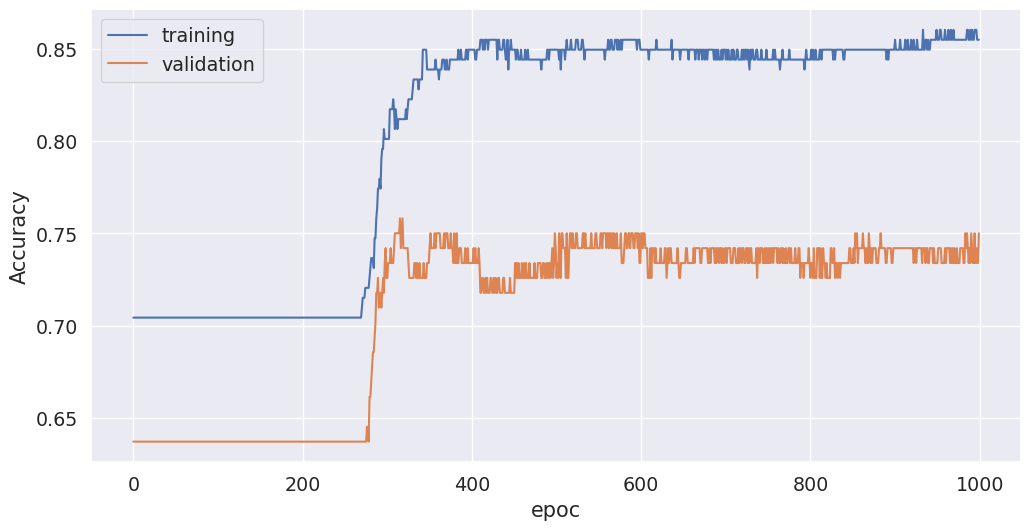

In [108]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["acc"], label="training")
plt.plot(history.history["val_acc"], label="validation")
plt.legend()

Que pasa si quiero guardar los pesos de mi mejor modelo: necesito usar callbacks

In [109]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

EarlyStopping para de entrenar el modelo según una condición sobre la variable monitor

In [110]:
es = EarlyStopping(monitor='val_acc', mode='max')

In [111]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(num_classes, activation="softmax"))
opt = keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 16)                112       
_________________________________________________________________
dense_45 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_46 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_47 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_________________________________________________________________


In [112]:
history = model.fit(X_train.values,y_train,epochs=1000, validation_data=(X_validation.values, y_test), callbacks=[es])

Train on 186 samples, validate on 124 samples
Epoch 1/1000
186/186 [==============================] - 0s - loss: 1.5770 - acc: 0.5323 - val_loss: 1.6522 - val_acc: 0.4516
Epoch 2/1000
186/186 [==============================] - 0s - loss: 1.4875 - acc: 0.4570 - val_loss: 1.5636 - val_acc: 0.4355


Por otro lado le puedo decir: si no mejoras despues de x épocas, deja de entrenar:

In [113]:
custom_early_stopping = EarlyStopping(monitor='val_acc', patience=200, mode='max')

In [114]:
history = model.fit(X_train.values,y_train,epochs=1000, validation_data=(X_validation.values, y_test), callbacks=[custom_early_stopping])

Train on 186 samples, validate on 124 samples
Epoch 1/1000
186/186 [==============================] - 0s - loss: 1.4288 - acc: 0.4516 - val_loss: 1.4831 - val_acc: 0.4274
Epoch 2/1000
186/186 [==============================] - 0s - loss: 1.3794 - acc: 0.4462 - val_loss: 1.4097 - val_acc: 0.4032
Epoch 3/1000
186/186 [==============================] - 0s - loss: 1.3333 - acc: 0.4194 - val_loss: 1.3453 - val_acc: 0.4032
Epoch 4/1000
186/186 [==============================] - 0s - loss: 1.2907 - acc: 0.4086 - val_loss: 1.2791 - val_acc: 0.4113
Epoch 5/1000
186/186 [==============================] - 0s - loss: 1.2500 - acc: 0.3871 - val_loss: 1.2188 - val_acc: 0.4032
Epoch 6/1000
186/186 [==============================] - 0s - loss: 1.2131 - acc: 0.3656 - val_loss: 1.1605 - val_acc: 0.4032
Epoch 7/1000
186/186 [==============================] - 0s - loss: 1.1799 - acc: 0.3656 - val_loss: 1.1111 - val_acc: 0.3952
Epoch 8/1000
186/186 [==============================] - 0s - loss: 1.1473 - acc

186/186 [==============================] - 0s - loss: 0.6525 - acc: 0.7903 - val_loss: 0.6364 - val_acc: 0.8145
Epoch 66/1000
186/186 [==============================] - 0s - loss: 0.6501 - acc: 0.7957 - val_loss: 0.6360 - val_acc: 0.8065
Epoch 67/1000
186/186 [==============================] - 0s - loss: 0.6480 - acc: 0.7903 - val_loss: 0.6353 - val_acc: 0.8065
Epoch 68/1000
186/186 [==============================] - 0s - loss: 0.6457 - acc: 0.7957 - val_loss: 0.6347 - val_acc: 0.7984
Epoch 69/1000
186/186 [==============================] - 0s - loss: 0.6438 - acc: 0.7903 - val_loss: 0.6339 - val_acc: 0.7984
Epoch 70/1000
186/186 [==============================] - 0s - loss: 0.6412 - acc: 0.7957 - val_loss: 0.6330 - val_acc: 0.7903
Epoch 71/1000
186/186 [==============================] - 0s - loss: 0.6388 - acc: 0.7957 - val_loss: 0.6321 - val_acc: 0.7903
Epoch 72/1000
186/186 [==============================] - 0s - loss: 0.6367 - acc: 0.7957 - val_loss: 0.6310 - val_acc: 0.7903
Epoch 

186/186 [==============================] - 0s - loss: 0.3660 - acc: 0.8226 - val_loss: 0.4143 - val_acc: 0.8145
Epoch 130/1000
186/186 [==============================] - 0s - loss: 0.3637 - acc: 0.8226 - val_loss: 0.4138 - val_acc: 0.8145
Epoch 131/1000
186/186 [==============================] - 0s - loss: 0.3615 - acc: 0.8280 - val_loss: 0.4130 - val_acc: 0.8145
Epoch 132/1000
186/186 [==============================] - 0s - loss: 0.3609 - acc: 0.8280 - val_loss: 0.4124 - val_acc: 0.8145
Epoch 133/1000
186/186 [==============================] - 0s - loss: 0.3587 - acc: 0.8333 - val_loss: 0.4120 - val_acc: 0.8145
Epoch 134/1000
186/186 [==============================] - 0s - loss: 0.3578 - acc: 0.8226 - val_loss: 0.4105 - val_acc: 0.8145
Epoch 135/1000
186/186 [==============================] - 0s - loss: 0.3570 - acc: 0.8280 - val_loss: 0.4107 - val_acc: 0.8145
Epoch 136/1000
186/186 [==============================] - 0s - loss: 0.3548 - acc: 0.8333 - val_loss: 0.4093 - val_acc: 0.8145

186/186 [==============================] - 0s - loss: 0.3286 - acc: 0.8441 - val_loss: 0.3984 - val_acc: 0.8145
Epoch 194/1000
186/186 [==============================] - 0s - loss: 0.3291 - acc: 0.8280 - val_loss: 0.3983 - val_acc: 0.8145
Epoch 195/1000
186/186 [==============================] - 0s - loss: 0.3281 - acc: 0.8333 - val_loss: 0.3991 - val_acc: 0.8145
Epoch 196/1000
186/186 [==============================] - 0s - loss: 0.3281 - acc: 0.8333 - val_loss: 0.3980 - val_acc: 0.8145
Epoch 197/1000
186/186 [==============================] - 0s - loss: 0.3274 - acc: 0.8333 - val_loss: 0.3989 - val_acc: 0.8145
Epoch 198/1000
186/186 [==============================] - 0s - loss: 0.3273 - acc: 0.8333 - val_loss: 0.3991 - val_acc: 0.8145
Epoch 199/1000
186/186 [==============================] - 0s - loss: 0.3271 - acc: 0.8280 - val_loss: 0.3987 - val_acc: 0.8145
Epoch 200/1000
186/186 [==============================] - 0s - loss: 0.3268 - acc: 0.8280 - val_loss: 0.3988 - val_acc: 0.8145

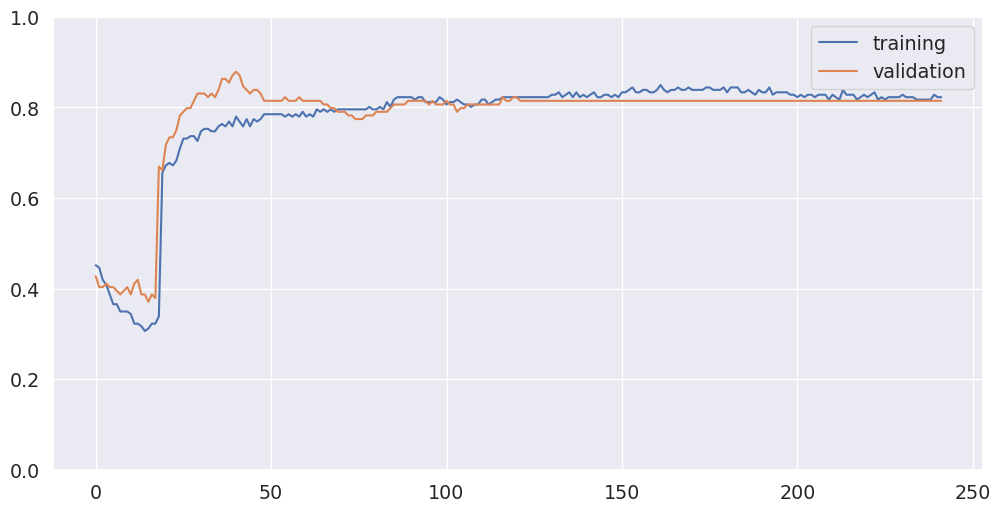

In [115]:
train_acc = history.history["acc"]
val_acc = history.history["val_acc"]
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(train_acc, label="training")
plt.plot(val_acc, label="validation")
plt.ylim(0,1)
plt.legend()

Puedo ademas guardar el mejor modelo usando ModelCheckpoint

In [116]:
mc = ModelCheckpoint('mejor_modelo.h5', monitor='val_acc', mode='max')

In [117]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(num_classes, activation="softmax"))
opt = keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()
history = model.fit(X_train.values,y_train,epochs=1000, validation_data=(X_validation.values, y_test), callbacks=[custom_early_stopping, mc])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 16)                112       
_________________________________________________________________
dense_49 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_50 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_51 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_________________________________________________________________
Train on 186 samples, validate on 124 samples
Epoch 1/1000
186/186 [==============================] - 0s - loss: 2.9405 - acc: 0.3226 - val_loss: 2.5103 - val_acc: 0.3710
Epoch 2/1000
186/186 [==============================] - 0s - loss: 2.7364 - acc: 0.3226 - val_loss: 2.355

186/186 [==============================] - 0s - loss: 0.3652 - acc: 0.8065 - val_loss: 0.4518 - val_acc: 0.7581
Epoch 59/1000
186/186 [==============================] - 0s - loss: 0.3647 - acc: 0.8172 - val_loss: 0.4518 - val_acc: 0.7581
Epoch 60/1000
186/186 [==============================] - 0s - loss: 0.3649 - acc: 0.8172 - val_loss: 0.4517 - val_acc: 0.7581
Epoch 61/1000
186/186 [==============================] - 0s - loss: 0.3630 - acc: 0.8226 - val_loss: 0.4526 - val_acc: 0.7581
Epoch 62/1000
186/186 [==============================] - 0s - loss: 0.3618 - acc: 0.8280 - val_loss: 0.4517 - val_acc: 0.7581
Epoch 63/1000
186/186 [==============================] - 0s - loss: 0.3622 - acc: 0.8226 - val_loss: 0.4528 - val_acc: 0.7581
Epoch 64/1000
186/186 [==============================] - 0s - loss: 0.3632 - acc: 0.8172 - val_loss: 0.4527 - val_acc: 0.7581
Epoch 65/1000
186/186 [==============================] - 0s - loss: 0.3601 - acc: 0.8280 - val_loss: 0.4523 - val_acc: 0.7581
Epoch 

186/186 [==============================] - 0s - loss: 0.3369 - acc: 0.8548 - val_loss: 0.4570 - val_acc: 0.7581
Epoch 123/1000
186/186 [==============================] - 0s - loss: 0.3369 - acc: 0.8441 - val_loss: 0.4569 - val_acc: 0.7581
Epoch 124/1000
186/186 [==============================] - 0s - loss: 0.3368 - acc: 0.8387 - val_loss: 0.4551 - val_acc: 0.7581
Epoch 125/1000
186/186 [==============================] - 0s - loss: 0.3356 - acc: 0.8441 - val_loss: 0.4567 - val_acc: 0.7581
Epoch 126/1000
186/186 [==============================] - 0s - loss: 0.3366 - acc: 0.8548 - val_loss: 0.4573 - val_acc: 0.7581
Epoch 127/1000
186/186 [==============================] - 0s - loss: 0.3352 - acc: 0.8495 - val_loss: 0.4562 - val_acc: 0.7581
Epoch 128/1000
186/186 [==============================] - 0s - loss: 0.3348 - acc: 0.8495 - val_loss: 0.4543 - val_acc: 0.7581
Epoch 129/1000
186/186 [==============================] - 0s - loss: 0.3344 - acc: 0.8548 - val_loss: 0.4547 - val_acc: 0.7581

186/186 [==============================] - 0s - loss: 0.3196 - acc: 0.8548 - val_loss: 0.4572 - val_acc: 0.7661
Epoch 187/1000
186/186 [==============================] - 0s - loss: 0.3196 - acc: 0.8495 - val_loss: 0.4572 - val_acc: 0.7661
Epoch 188/1000
186/186 [==============================] - 0s - loss: 0.3207 - acc: 0.8548 - val_loss: 0.4580 - val_acc: 0.7581
Epoch 189/1000
186/186 [==============================] - 0s - loss: 0.3198 - acc: 0.8548 - val_loss: 0.4569 - val_acc: 0.7661
Epoch 190/1000
186/186 [==============================] - 0s - loss: 0.3203 - acc: 0.8548 - val_loss: 0.4547 - val_acc: 0.7661
Epoch 191/1000
186/186 [==============================] - 0s - loss: 0.3194 - acc: 0.8495 - val_loss: 0.4545 - val_acc: 0.7661
Epoch 192/1000
186/186 [==============================] - 0s - loss: 0.3198 - acc: 0.8548 - val_loss: 0.4571 - val_acc: 0.7661
Epoch 193/1000
186/186 [==============================] - 0s - loss: 0.3196 - acc: 0.8548 - val_loss: 0.4558 - val_acc: 0.7661

Puntos clave: 
    - usar activación de tipo "linear" como capa final en regresión y "softmax" en clasificación
    - Para mayor cantidad de neuronas y capas -> métodos de regularización:
            - Dropout
            - Regularización l2, l1, l1-l2
            - Early stopping
    - Es recomendable usar activaciones de tipo relu para redes profundas
    - No siempre los optimizadores más sofisticados funcionan mejor: tengo más parámetros de los cuales muchos les dejo el valor por default, a veces es mejor tener un método simple como SGD e ir controlando el learning rate
    - Navaja de occam: ir de pocas neuronas y pocas capas a modelos más complejos(más cosas pueden fallar en el  entrenamiento)
    - No es simple el diagnóstico a partir de la curva de aprendizaje, se va adquiriendo un poco con la práctica.